# Implementation of Non-Linear Regression and Non-Linear Logistic Regression using 5-fold Cross Validation 

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Data for Regression

## Description

This is a dataset for hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Since this data was large enough and containing two individual datasets for daily and hourly count of rental bikes, I chose **hourly dataset** for my analysis. I got this data from **UCI Machine Learning repository**.

Below are the descriptive features of this dataset:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

##### Source of Data:

Fanaee-T, Hadi, and Gama, Joao, _'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg_, University of Porto,
2013, https://link.springer.com/article/10.1007%2Fs13748-013-0040-3

Dataset Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 

### Reading Data

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset for regression
dataset = pd.read_csv('bike_hour.csv')

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [130]:
#Checking if there is any missing attribute in the entire dataset
np.any(dataset.isnull())

False

Good news! There is no missing data in this dataset, so we don't need to handle missing values for this dataset.

In [131]:
dataset.shape

(17379, 17)

In [132]:
# Separating the dependent variables and independent variable in two different datasets
# X conatins all the independent variables
# Y contains the only dependent variable i.e. count of the rented bikes.
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

### Visualization of Data

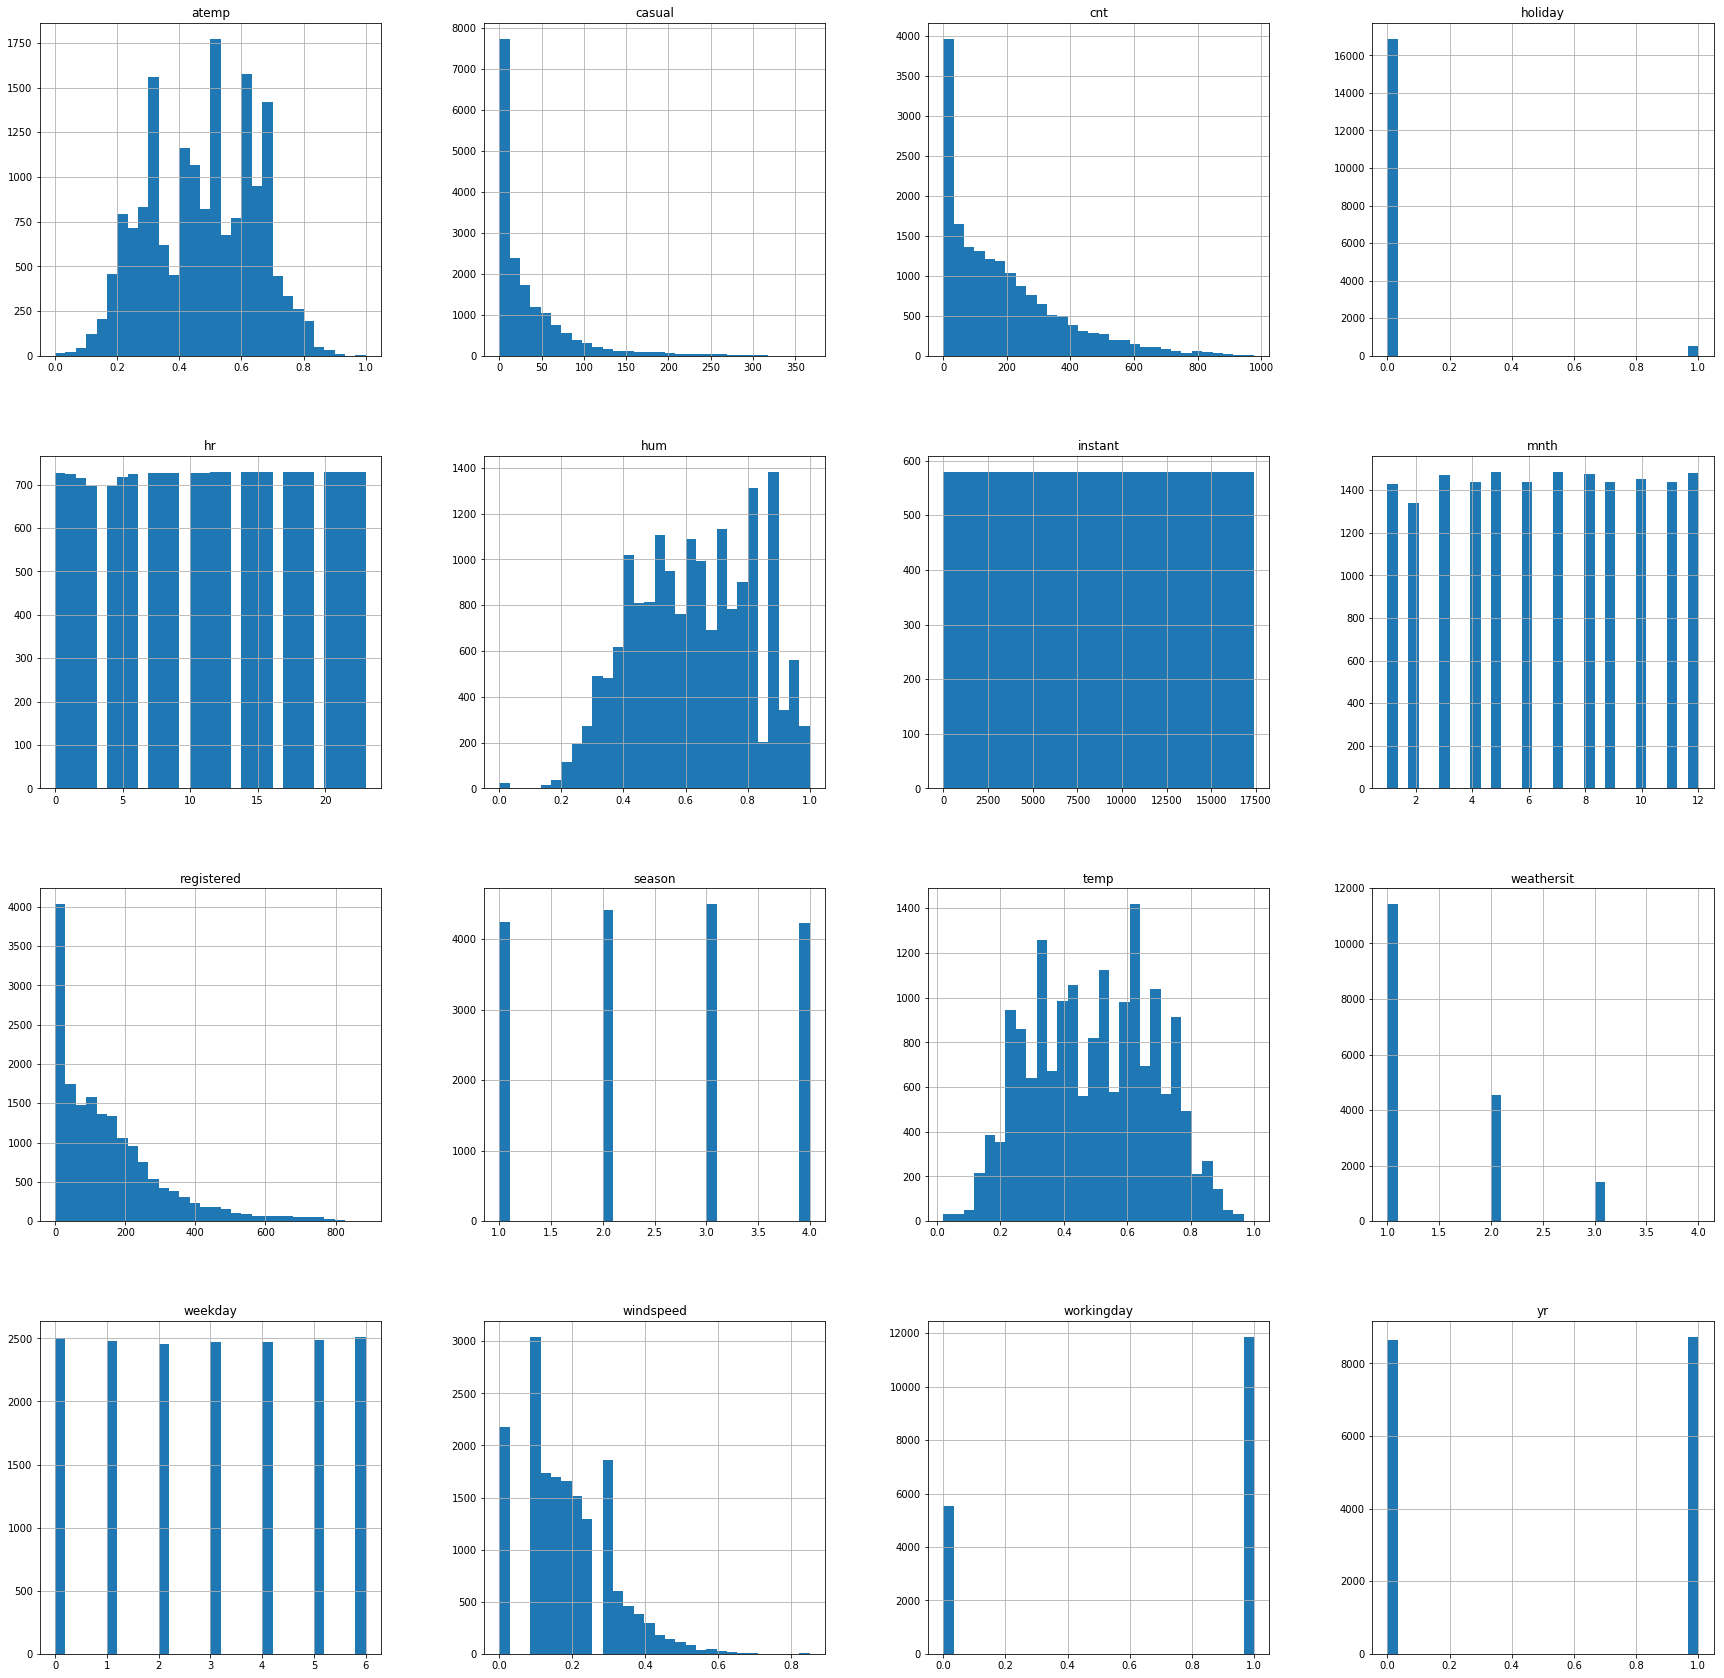

In [133]:
dataset.hist(bins=30, figsize=(30,30))
plt.show()

This plot gives the overall idea about the dependent variables of the dataset. All the values seem to be in nominal range, so this dataset does not require scaling.

###### Lets visualize this data furthermore. The weather conditions are very important in the bike renting data. We will visualize the count of rented bikes(hourly) wrt climatic parameters like temperature, windspeed and also will try to analyse the trend on different days of the week.

Text(0.5, 1.0, 'Temperature VS Count')

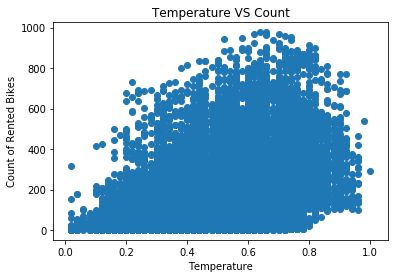

In [15]:
plt.scatter(X.iloc[:,10],Y)
plt.xlabel("Temperature")
plt.ylabel("Count of Rented Bikes")
plt.title("Temperature VS Count")

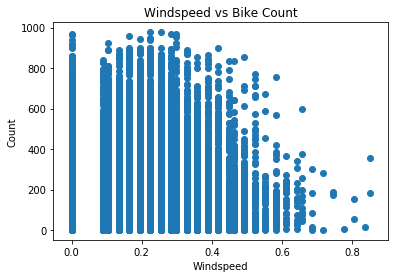

In [16]:
plt.scatter(X.iloc[:,13], Y)
plt.title('Windspeed vs Bike Count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

The higher the windspeed, lesser the count of rented bikes. If there is lesser windspeed, then the count of rented bikes goes higher.

<Figure size 2880x360 with 0 Axes>

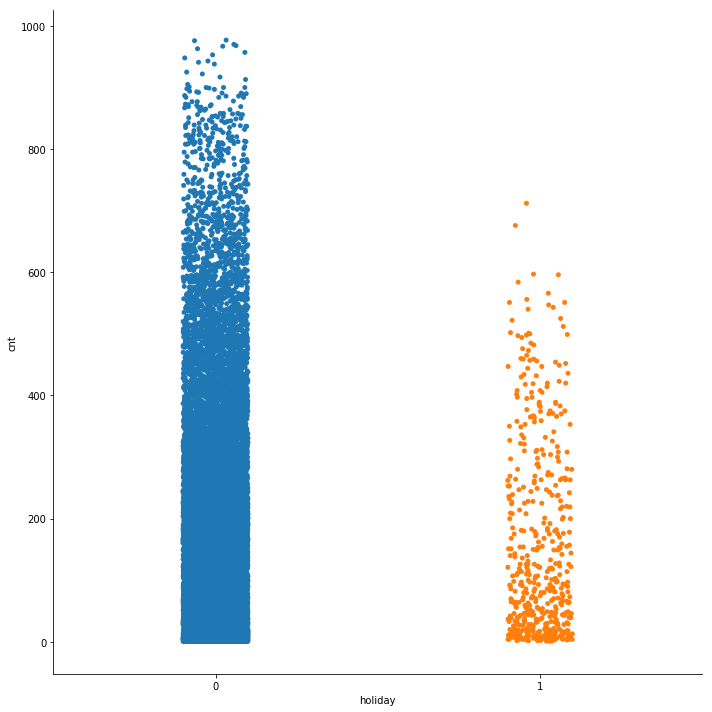

In [138]:
fig = plt.figure(figsize=(40,5))
sns.catplot(data=dataset, x="holiday", y="cnt", height = 10)

1 if it is a holiday, 0 if it is a non-holiday. This plot adds more weightage to the point discussed in last plot i.e. people o Holidays used lesser bike compared to non-holiday.

<Figure size 2880x360 with 0 Axes>

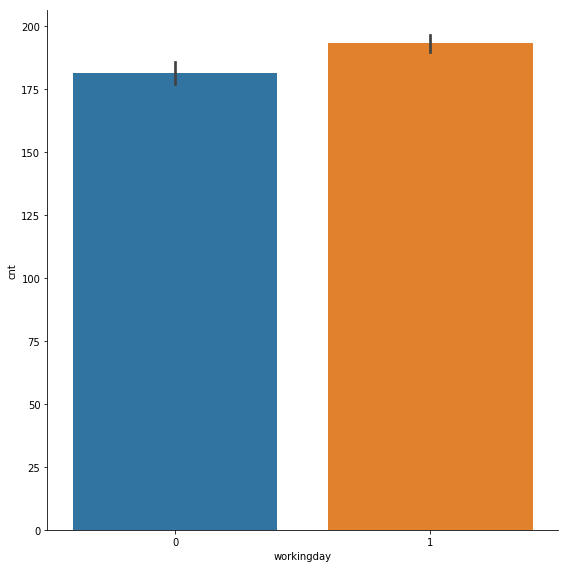

In [46]:
fig = plt.figure(figsize = (40,5))
sns.catplot(data=dataset, x = "workingday", y ="cnt",height=8,kind='bar')

1 if it is a working day, 0 if it is a holiday or weekend. We can visualize from above catplot that there are more rented bikes on working day than on a non working day, which can point to one conclusion that people in Portugal might be using bike for work.

<Figure size 2880x360 with 0 Axes>

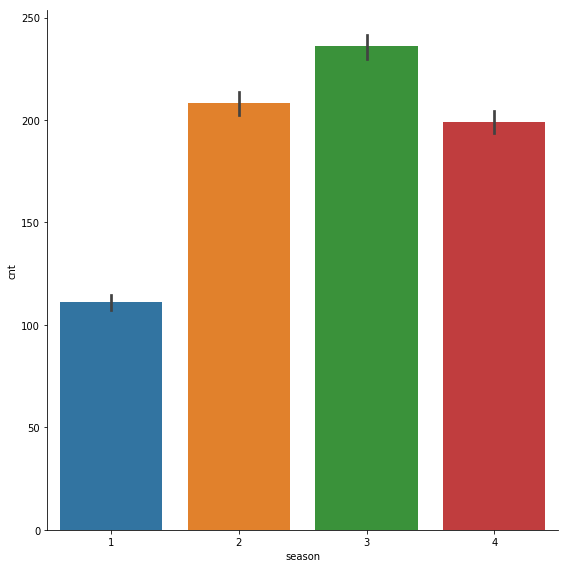

In [47]:
fig = plt.figure(figsize = (40,5))
sns.catplot(data=dataset, x = "season", y ="cnt",height=8,kind='bar')

seasons - > 1:springer, 2:summer, 3:fall, 4:winter
It is evident from the above catplot that people rented more biked in Fall compared to Summer or Spring.

## Preliminary Observation

We used various python libraries such as pandas, numpy, matplotlib, seaborn to import datasets, data preprocessing and visualisation. We also found that there are no missing values in this dataset or any categorical data that needed special handling. In this bike_hour.csv dataset, we had various dependent variables like temperature, humidity, windspeed, holiday, working day, seasons, etc and this regression problem was to predict the count of rented bikes. We plotted various graphs like histogram, catplots, scatter plots and observed some interesting information about the data summarised as following:

* People prefer to go to work using bikes and there are more rented bikes on weekday rathar than any holiday or weekend.
* Windspeed plays a key role in bike renting. If the windspeed was less i.e. between 0 - 0.2, teh count of rented bikes per hour was between range 800 and 1000. However, as we see the days where windspeed was higher i.e between 0.7-0.8, the count of rented bikes was signficantly down under 400.
* The last catplot provided another angle for the data observaion. The average bikes rented in Fall season were the highest, however Spring was the least productive season for bike renters, where average count of bike renting was close to just 100 per hour.

## Preprocessing of the data

Let me visualise the list of all independent variables through a corelation heatmap using seaborn.

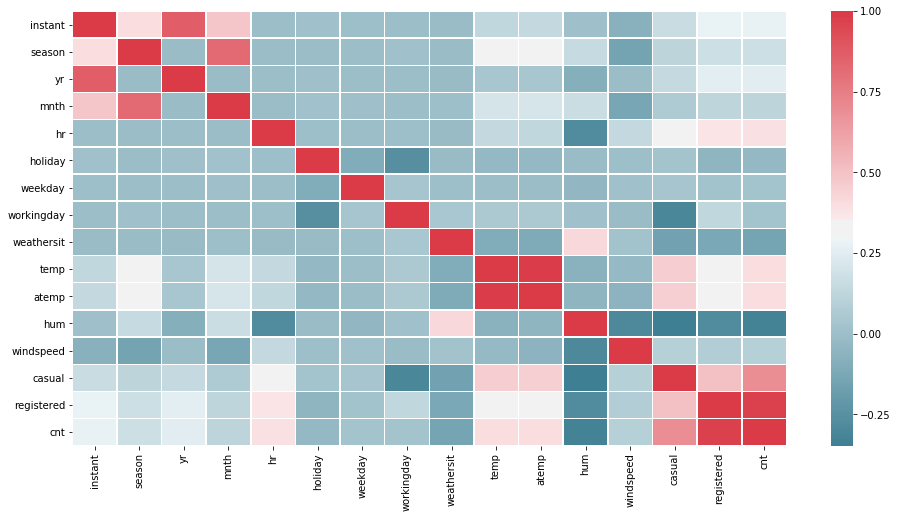

In [20]:
#Correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = dataset.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap=cmap, linewidths = 0.5)


In [14]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Removing the unwanted column

Attribute "**dteday**" is string with date which is not relevant to this prediction model. There are 768 unique dates in the dataset. If we convert this categorical variable using One Hot Encoder or Label Encoder, then this will result in (768+17)=785 columns in the dataset. I will discuss this in the later part of the report ("Experiments") section. For now, I will be dropping this column off the dataset.

In [4]:
dataset = dataset.drop("dteday", axis = 1)
print("Shape : {}".format(dataset.shape))
dataset.head()

Shape : (17379, 16)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###### Categorical Values

There are few categorical columns in our dataset such as:

season : season (1:springer, 2:summer, 3:fall, 4:winter)

weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We will enhance these features by separating different seasons and weathers.

In [135]:
dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
dataset = pd.concat([dataset.iloc[:,0:1],pd.get_dummies(dataset['season'], prefix='season'), dataset.iloc[:,2:8], 
               pd.get_dummies(dataset['weathersit'],prefix='weather'), dataset.iloc[:,9:]],axis=1)
dataset.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_2,weather_3,weather_4,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,0,0,1,0,0,6,...,0,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,0,0,0,1,1,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,0,0,0,1,2,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,0,0,0,1,3,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,0,0,0,1,4,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,0,1,1


So, we have taken care of the categorical variables in our dataset by separating them to different columns.

##### Outliers

At first look, "cnt" variable contains lot of outlier data points which skews the distribution. Lets create boxplots to visualise the outliers in our dataset.

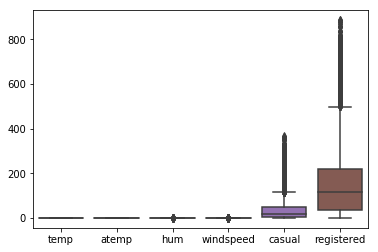

In [139]:
fig.set_size_inches(10,10)
sns.boxplot(data=dataset[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered']])
fig=plt.gcf()

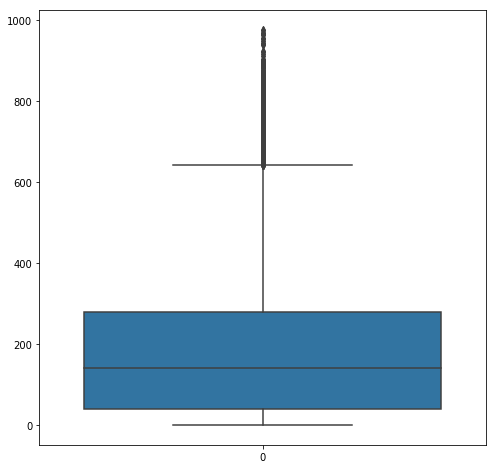

In [19]:
sns.boxplot(data=dataset['cnt'])
fig=plt.gcf()
fig.set_size_inches(8,8)

As per Chebychev's rule, 3 std. deviations account for 99% of data. Using this approach, we filter out the rest of the data.

**Lets Remove Outliers In The Count Column**

In [6]:
print("Dataset shape before : {}".format(dataset.shape))
dataset =  dataset[(np.abs(dataset['cnt']-dataset['cnt'].mean()))<=(3*dataset['cnt'].std())]
print("Dataset shape after removing outliers : {}".format(dataset.shape))

Dataset shape before : (17379, 22)
Dataset shape after removing outliers : (17135, 22)


As per the inferences taken from correlation heatmap, I am going to remove below features from my dataset.

**Features to be removed : "hum", "weather_1", "weather_2", "weather_3", "weather_4", "windspeed", "weekday", "holiday" , "casual", "atemp"**

In [7]:
#Dropping some unnecessary columns
dataset = dataset.drop(["hum", "weather_1", "weather_2", "weather_3", 
                   "weather_4", "windspeed", "weekday", "holiday" , "casual", "atemp"], axis = 1)

In [8]:
#Resetting the dataset indices
dataset = dataset.reset_index(drop = True)

In [9]:
dataset.shape

(17135, 12)

##### Segregate Dependent and Independent Variables

Let's first divide the independent and dependent variables. In my dataset, "cnt" is the dependent variable that we will be predicting using this Linear Model, rest all the attributes are independent.

In [10]:
X = dataset.iloc[:,:-1]
T = dataset.iloc[:,-1:]
print("Shape of X : {} \nShape of T : {}".format(X.shape,T.shape))

Shape of X : (17135, 11) 
Shape of T : (17135, 1)


##### Feature Scaling

Feature scaling is a method used to standardize the range of independent variables in the dataset. Although, temp, atemp , hum are normalised in the inital dataset, I will be performing **Data Normalization** to fine tune the parameters further. Lets define a function to normalize the independent variables.

In [11]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

##### Partitioning Data

I have defined this function to partition the dataset. This will first shuffle the indices of the dataset randomly, then I compute the size of training and test dataset and create the datasets using these randomly shuffled indices.

In [12]:
def partition(X, T, train_ratio): 
    """
    Partion the dataset to test and train
    
    Parameters
    -----------
    
    X: 2-d array of independent variables
    T: 1-d or 2-d array of dependent variable
    train_ratio : ratio of desired training dataset
    
    Returns
    --------
    
    4 lists with splitted datasets
    
    """
    
    # create random train/test split
    N = X.shape[0]
    idxs =  np.random.permutation(X.index)
    nrows = int(train_ratio * N)
    
    train_idxs = idxs[:nrows]
    test_idxs = idxs[nrows:]

    # split the actual data
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    T_train, T_test = T.iloc[train_idxs], T.iloc[test_idxs]
    
    return X_train,X_test, T_train, T_test

The partition function that I defined will be returning dataframes not numpy arrays. I have done this because I will need these dataframes while visualizng my results in the later part of this exercise.

In [13]:
X_tr, X_ts, T_tr, T_ts = partition(X, T, train_ratio = 0.8 )

In [14]:
X_tr = X_tr.reset_index(drop = True)
T_tr = T_tr.reset_index(drop = True)
X_ts = X_ts.reset_index(drop = True)
T_ts = T_ts.reset_index(drop = True)

In [15]:
#Converting dataframes to numpy arrays
X_train = X_tr.values
X_test = X_ts.values
T_train = T_tr.values
T_test = T_ts.values

In [16]:
print(X_train.shape,X_test.shape,T_train.shape,T_test.shape)

(13708, 11) (3427, 11) (13708, 1) (3427, 1)


# Data for Classification

### Description

This is a dataset for "Adult Census Income" from 1994. This is a multivariate dataset consisting of 14 attributes and more than 30K samples. This is a classification problem to predict whether income exceeds $50K/yr or not based on census data.
I got this data from UCI Machine Learning repository.

Below are

Listing of attributes: 

* **income** - >50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. { Description of fnlwgt (final weight) --> The weights on the CPS files are controlled to independent estimates of the civilian non institutional population of the US.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,                10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-               inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Source of Data

Ron Kohavi, _"Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"_, Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 
1996, http://robotics.stanford.edu/~ronnyk/nbtree.pdf

Dataset Source : https://archive.ics.uci.edu/ml/datasets/Adult

In [17]:
#Reading Dataset

df = pd.read_csv("adult.csv")

In [18]:
#Verifying the shape of data
df.shape

(32561, 15)

In [19]:
#Listing the columns of the dataset
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'captial-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [154]:
#Checking if there is any missing attribute in the entire dataset
np.any(df.isnull())

False

In [155]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [156]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
captial-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

There seem to be missing values in the data and the fields are filled with '?'. We will need to remove those rows so that Machine Learning Algorithms can be applied properly on such datasets.

**The income that will be predicted as part of Classification problem currently exists as <=50K or >50K. We can convert this to a binary classifier (0,1) where 0 means income <= 50K and 1 means income > 50K**

In [20]:
#Replace '?' with NaN and then use dropna() method to delete all such rows
df = df.replace(' ?', np.NaN)
df = df.dropna()

df['income'] = df['income'].map({' <=50K' : 0, ' >50K' : 1})

Income has been successfully converted to a binary classifier (0,1), which we will use to plot and visualise the data in next step.

### Plots for Understanding and Analysis


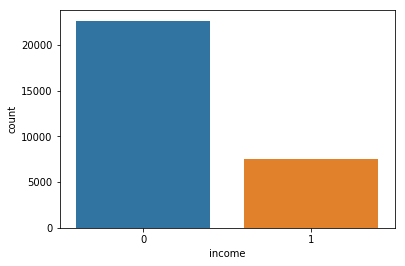

In [199]:
#Countplot of income
sns.countplot(df['income'])

Above plot shows that out of the 30K samples in our dataset, we have over 20K people whose income is less than or equal to 50K where as count of people with income over 50K is somewhere between 5K to 10K.

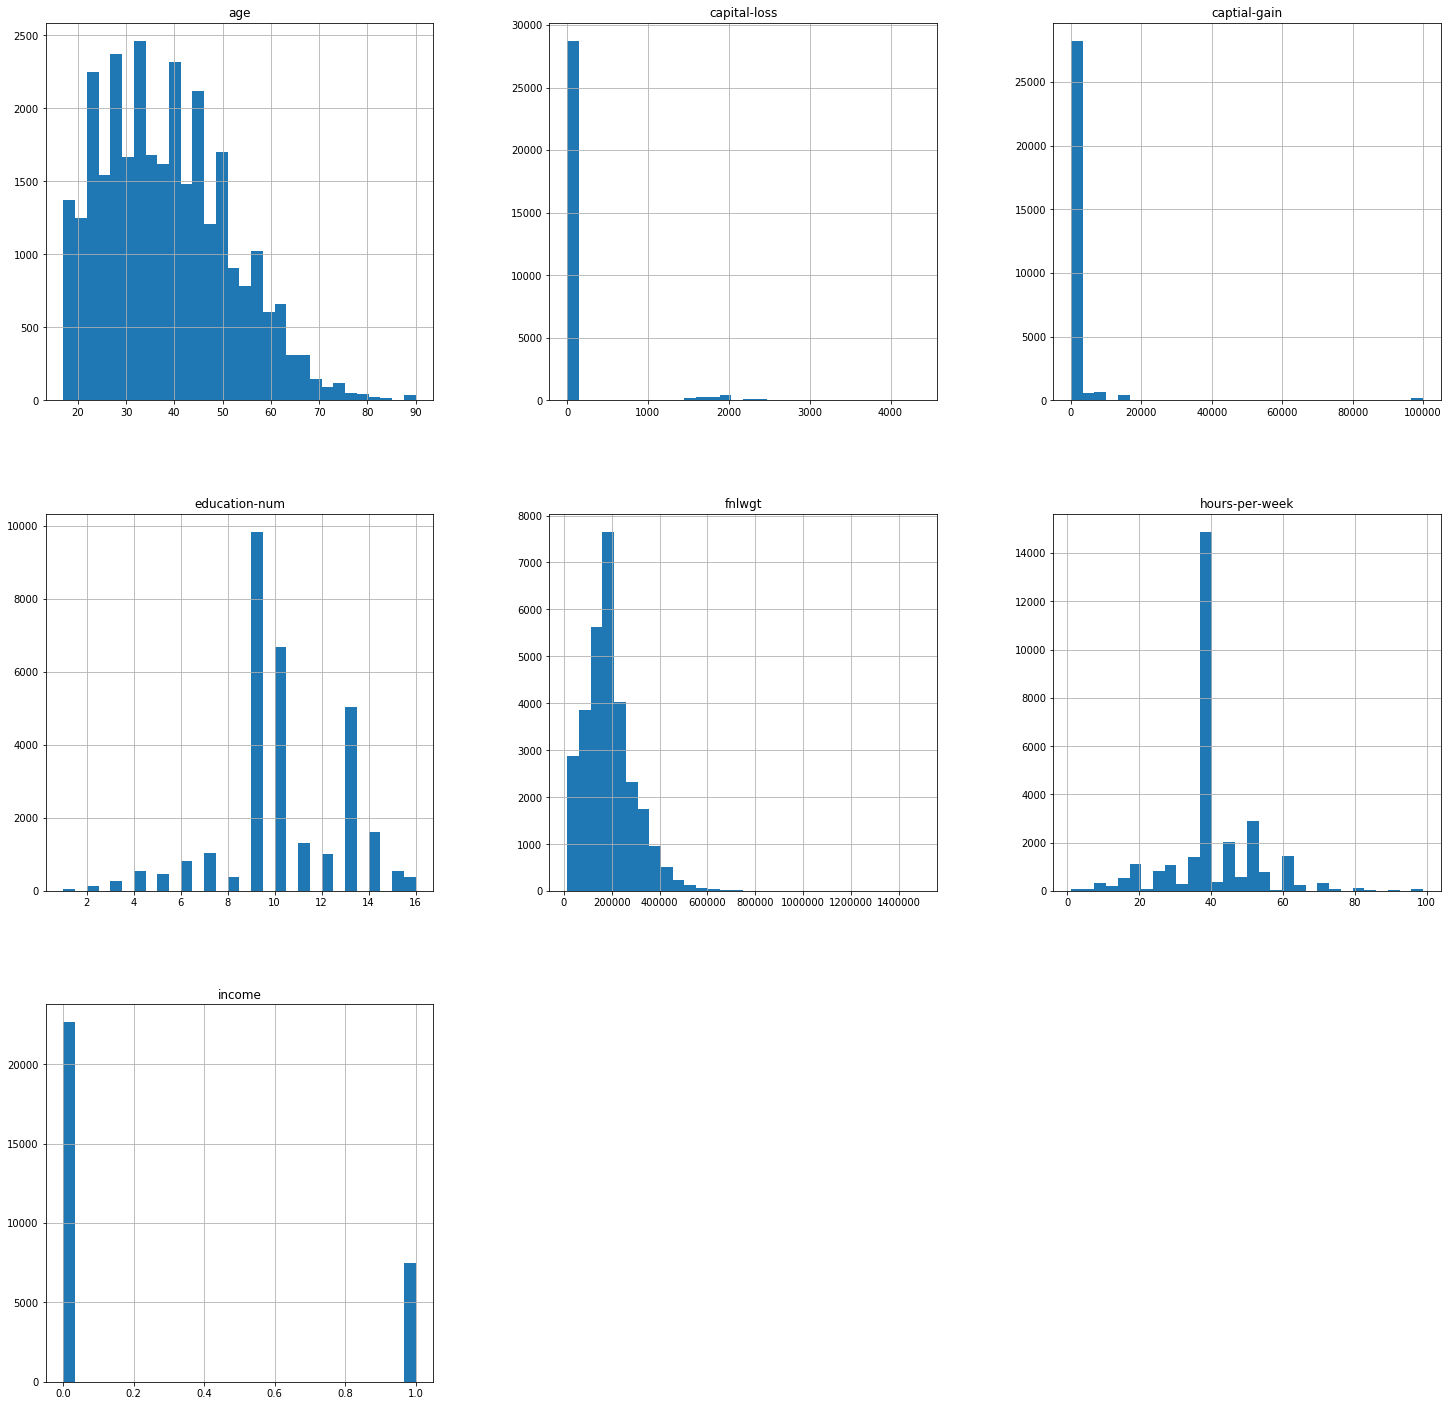

In [200]:
# To get the overall idea about the range of the attributes
df.hist(bins=30, figsize=(25,25))
plt.show()

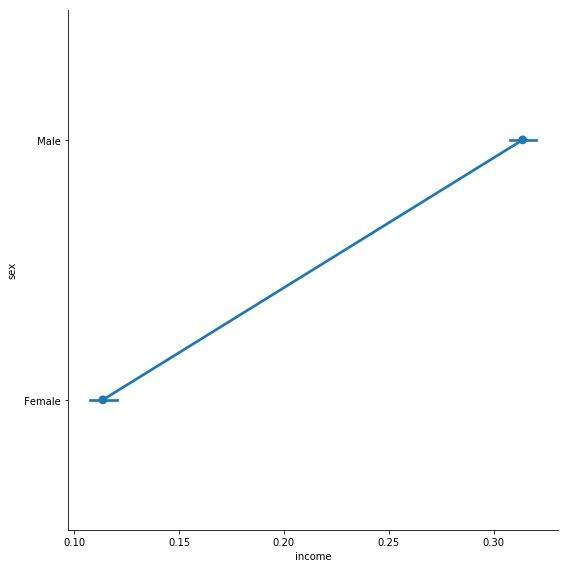

In [69]:
#Countplot for Income as per the sex
sns.catplot(data = df, x='income', y='sex', height = 8, kind='point' )

A plot for incomes for males and females. It depicts that incomes for males is greater compared to females.

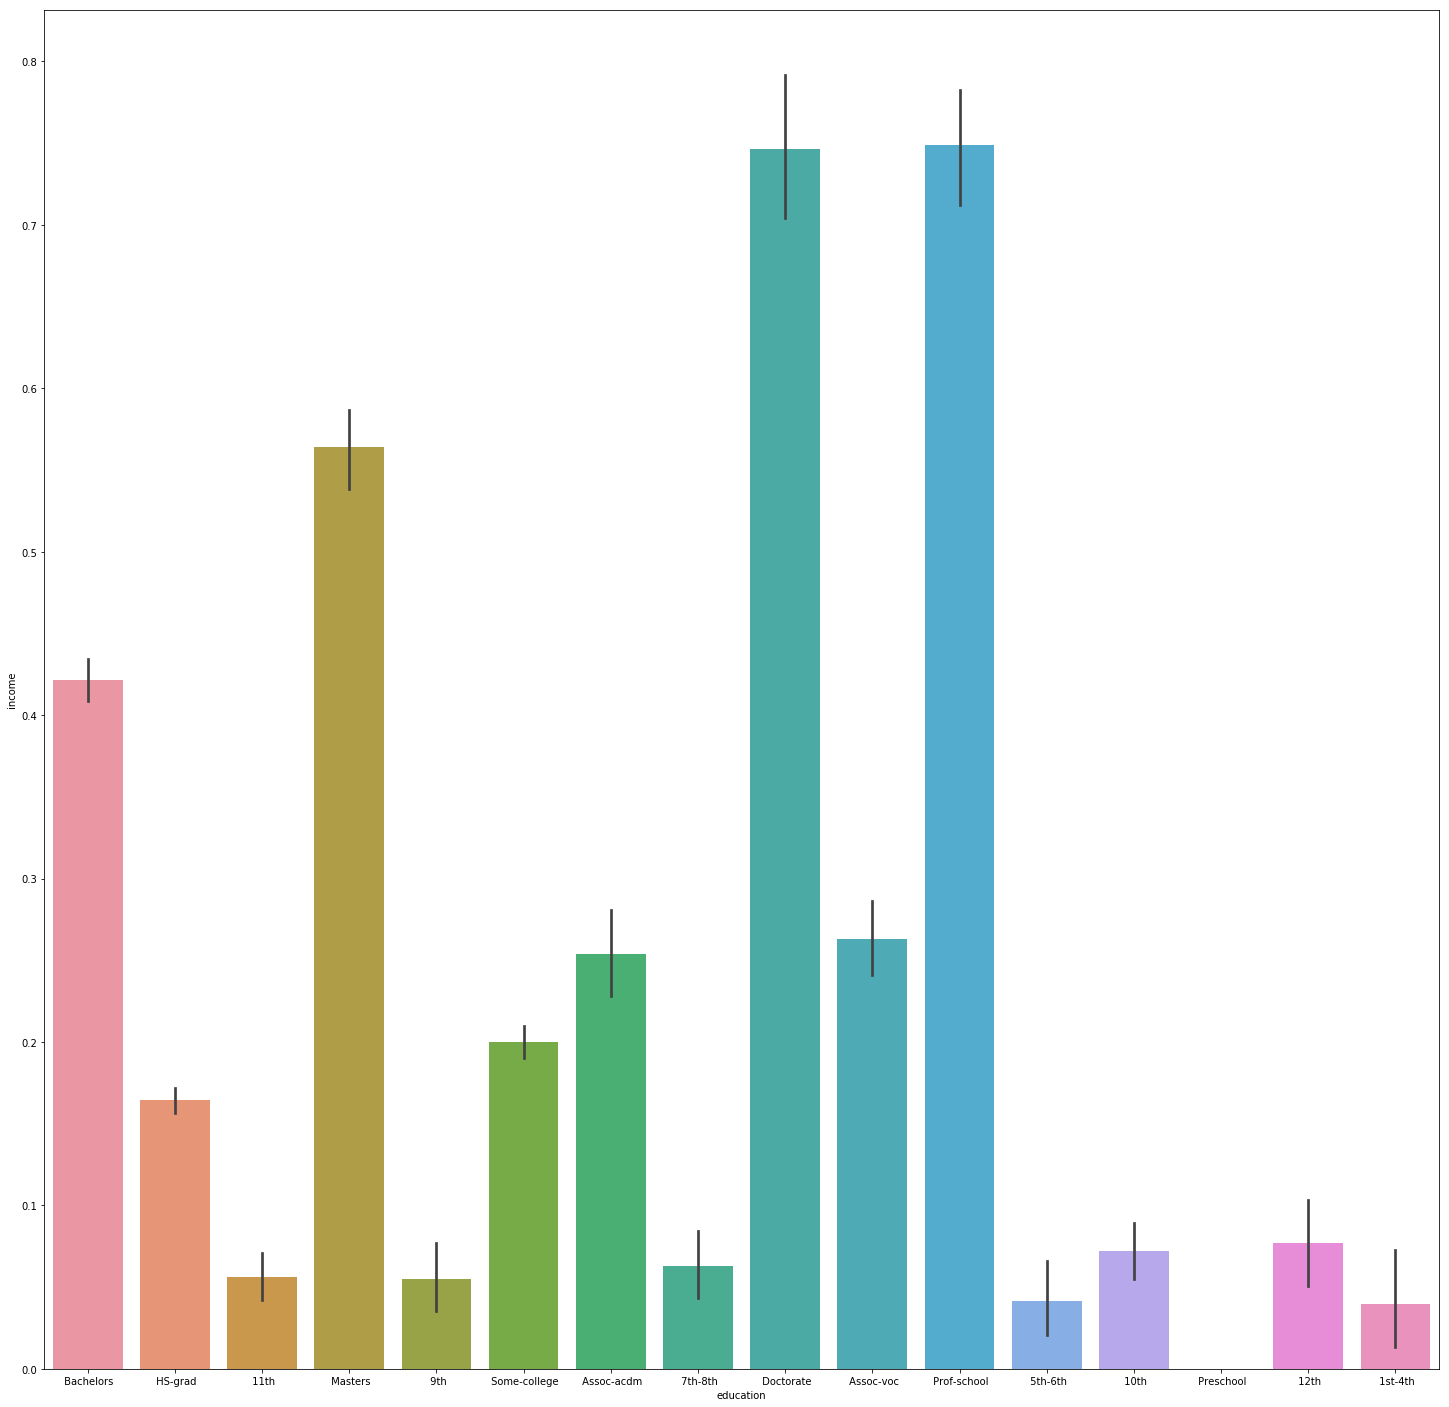

In [202]:
#Count plot as per the education of the population
plt.figure(figsize=(25,25))
sns.barplot(data=df, x = 'education', y = 'income')

Above plot shows the income based on the education of the population collected for this dataset. Doctorate & Prof-School seem to earning highest.

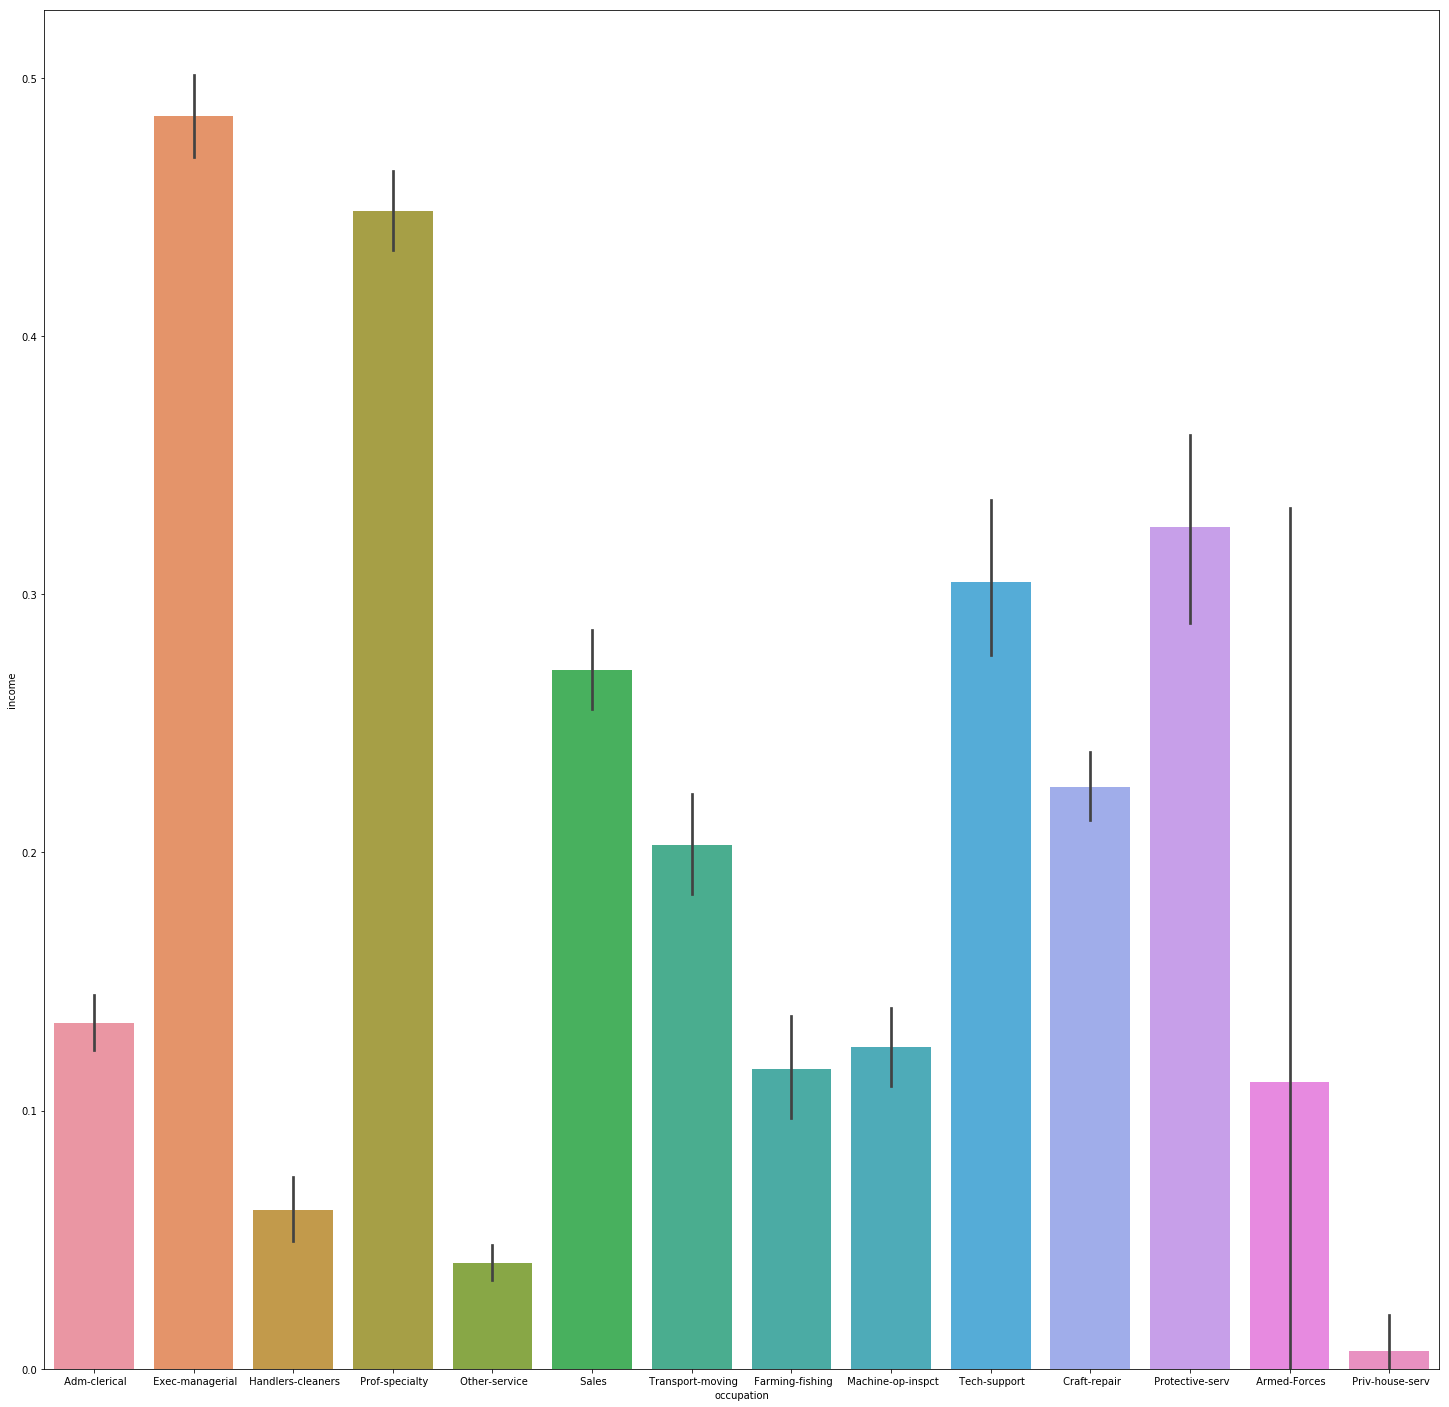

In [203]:
#Count plot as per the occupation of the population
plt.figure(figsize=(25,25))
sns.barplot(data=df, x = 'occupation', y = 'income')

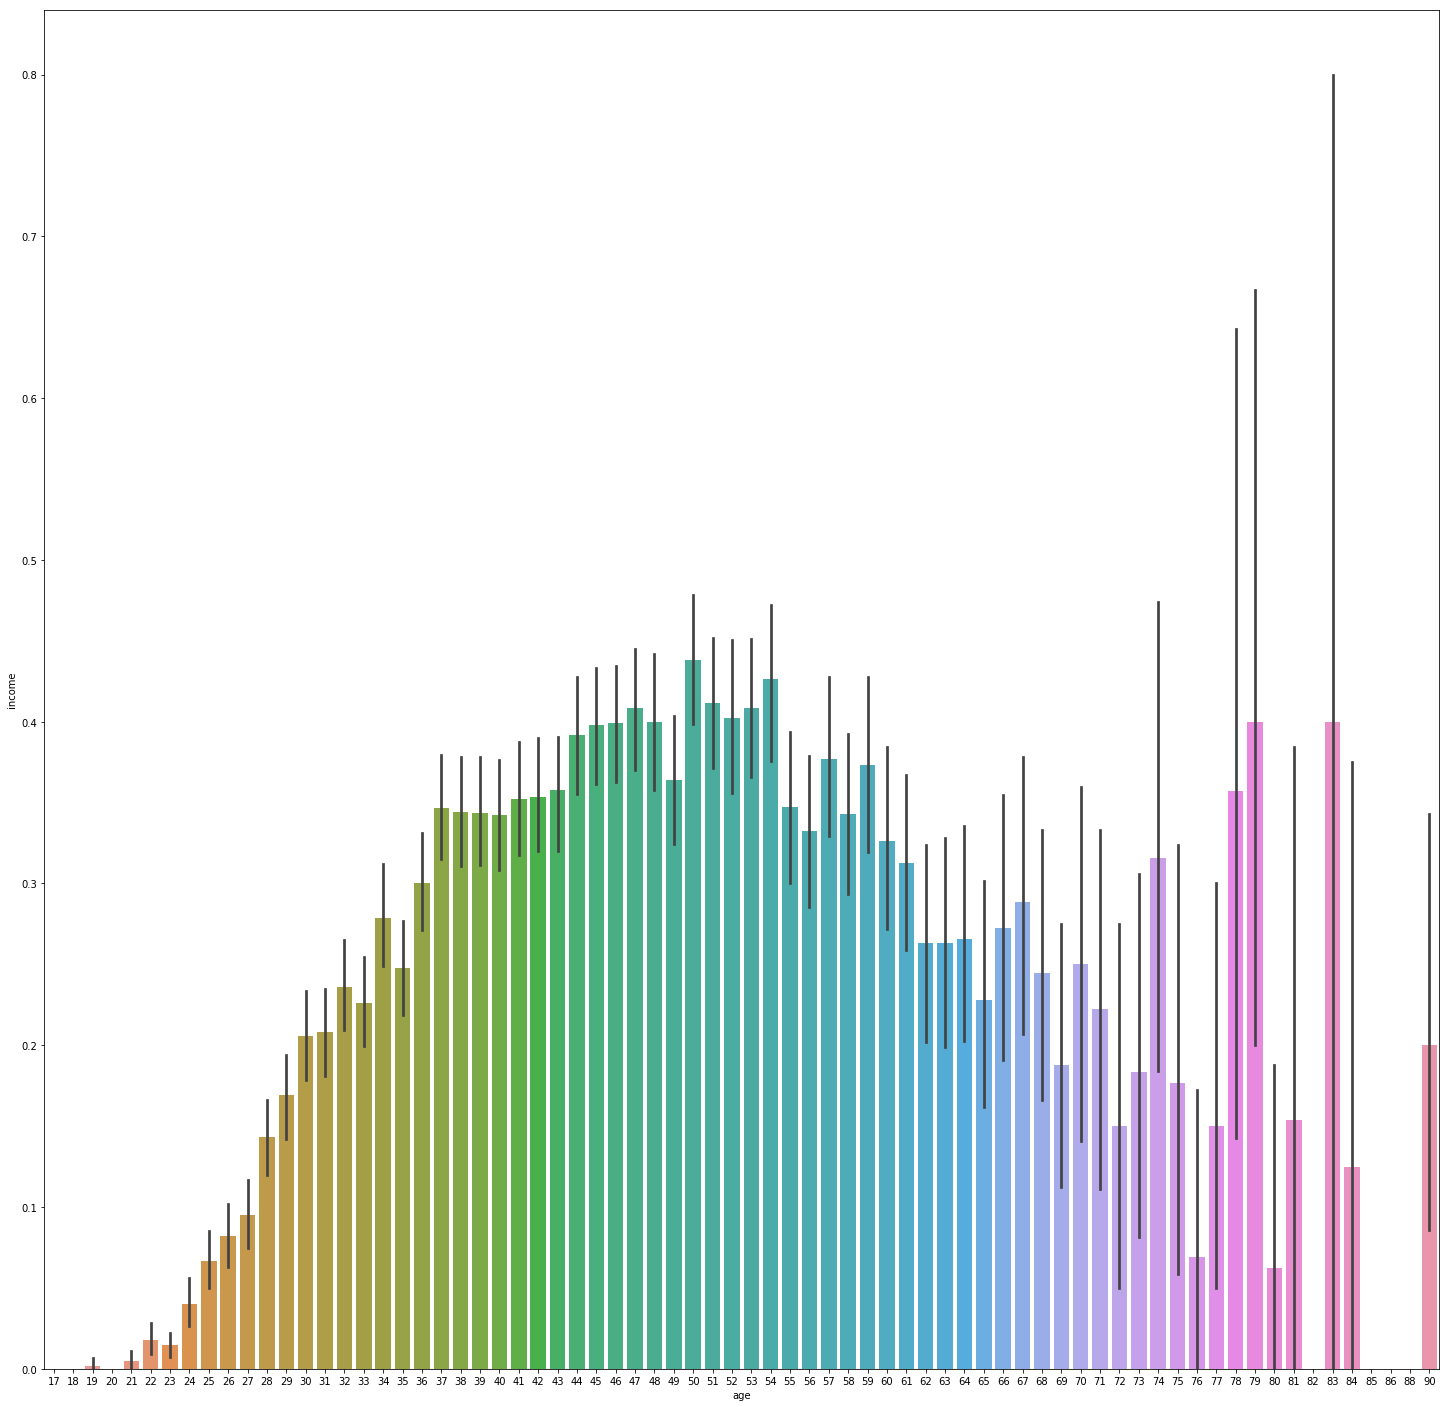

In [206]:
#Count plot for ncome as per the age of the population
plt.figure(figsize=(25,25))
sns.barplot(data=df, x = 'age', y = 'income')

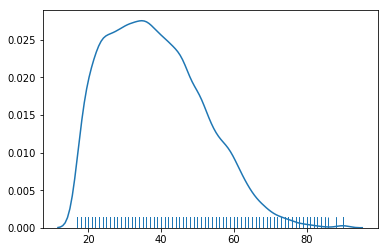

In [207]:
sns.distplot(np.array(df['age']), hist=False, rug=True)

### Preliminary Observation

Again first we imported the dataset, "adult.csv" and checked the basic attributes of the dataset. On observation, we found that there are some missing values in the dataset in the form of a special character " ?", used the replace and dropna methods to take care of missing data. In this dataset, the ultimate goal was to predict whether the salary of the person is over 50K or not. However, we needed to convert this attribute to binary classifiers (0,1), where 0 means income <= 50K and 1 means income > 50K.

Next, we splitted dataset to X and Y , where Y is the dependent variable and X contains all the independent variables. Then we plotted countplots, barplots, catplots, scatter plot and histograms for these variables. Most of the people in this dataset are earning less than 50K, a very small fraction of the population was earning over 50K. Next we plotted histograms for all the continuous attributes of the dataset and observed that were no major challenges in the dataset that needed to be scaled. We plotted age, sex, education and occupation to the income and observed following:

* People with age more than 78 are more probable of earning over 50K, while people under 20 years are more probable of earning less than 50K. 
* Exec-Managerials and Prof-Speciality are the ones most probable to earn over 50K, while people in occupation like Armed Forces, Other Services, Handlers-Cleaners are less probable to earn 50K or more.
* People who work as private house servant are least probable of earning >50k.
* Probability of males earning more than 50K is greater than females as per the catplot between Sex and income.

### Preprocessing



In [208]:
df.describe()

,age,fnlwgt,education-num,captial-gain,capital-loss,hours-per-week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


fnlwgt appears to be highly dispersive, we can remove it.

In [21]:
df = df.drop(['fnlwgt'], axis=1)
df.head()

,age,workclass,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [210]:
df.shape

(30162, 14)

Finding out the unique values for the categorical variables.

In [71]:
print(df.workclass.unique())
print()
print(df.education.unique())
print()
print(df['marital status'].unique())
print()
print(df.occupation.unique())
print()
print(df.relationship.unique())
print()
print(df.race.unique())
print()
print(df.sex.unique())
print()
print(df['native-country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

[' Male' ' Female']

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland'

There are many unique values for each of the category. If I use one hot encoder, then the data will be very sparse. To avoid this, lets generalise some categorical variables.

##### Workclass 
Lets classify it as Govt, Private, Self Employed and Unemployed.

##### Marital Status
Lets classify this simply as married and not married.

##### Education
Lets classify education as dropout, Bachelors, Masters, CommunityCollege, Doctorate, High Grad.

##### Country
Lets classify this as USA and rest of world (ROW) to avoid complexity.



In [22]:
#Workclass

df['workclass'].replace(' State-gov', 'Govt', inplace=True)
df['workclass'].replace(' Self-emp-not-inc', 'Self-Employed', inplace=True)
df['workclass'].replace(' Federal-gov', 'Govt', inplace=True)
df['workclass'].replace(' Local-govv', 'Govt', inplace=True)
df['workclass'].replace(' Self-emp-inc', 'Self-Employed', inplace=True)
df['workclass'].replace(' Without-pay', 'Unemployed', inplace=True)

# Marital Status

df['marital status'].replace(' Never-married', 'Not Married', inplace = True)
df['marital status'].replace(' Married-civ-spouse', 'Married', inplace = True)
df['marital status'].replace(' Divorced', 'Not Married', inplace = True)
df['marital status'].replace(' Married-spouse-absent', 'Not Married', inplace = True)
df['marital status'].replace(' Separated', 'Not Married', inplace = True)
df['marital status'].replace(' Married-AF-spouse', 'Married', inplace = True)
df['marital status'].replace(' Widowed', 'Not Married', inplace = True)

In [23]:
# Native Country

for i in df['native-country']:
    if i != " United-States":
        df['native-country'].replace(i, 'ROW', inplace = True)
    else:
        df['native-country'].replace(i, 'USA', inplace = True)

In [24]:
#Education

df['education'].replace(' HS-grad', 'High Grad', inplace = True)
df['education'].replace(' 11th', 'Dropout', inplace = True)
df['education'].replace(' 9th', 'Dropout', inplace = True)
df['education'].replace(' 7th-8th', 'Dropout', inplace = True)
df['education'].replace(' 5th-6th', 'Dropout', inplace = True)
df['education'].replace(' 10th', 'Dropout', inplace = True)
df['education'].replace(' 12th', 'Dropout', inplace = True)
df['education'].replace(' 1st-4th', 'Dropout', inplace = True)
df['education'].replace(' Preschool', 'Dropout', inplace = True)
df['education'].replace(' Some-college', 'CommunityCollege', inplace = True)
df['education'].replace(' Assoc-acdm', 'CommunityCollege', inplace = True)
df['education'].replace(' Assoc-voc', 'CommunityCollege', inplace = True)
df['education'].replace(' Prof-school', 'Masters', inplace = True)
df['education'].replace(' Masters', 'Masters', inplace = True)

In [26]:
df_new = pd.concat([
                            df.iloc[:,0:1], pd.get_dummies(df['workclass']),
                         pd.get_dummies(df['education']),df.iloc[:,3:4],
                       pd.get_dummies(df['marital status']),
                         pd.get_dummies(df['occupation']),
                         pd.get_dummies(df['relationship']),
                         pd.get_dummies(df['race']),
                         pd.get_dummies(df[ 'sex']),
                    df.iloc[:,9:12], pd.get_dummies(df['native-country']), df.iloc[:,-1]],  axis = 1  )

In [27]:
df_new.head()

,age,Local-gov,Private,Govt,Self-Employed,Unemployed,Bachelors,Doctorate,CommunityCollege,Dropout,...,Other,White,Female,Male,captial-gain,capital-loss,hours-per-week,ROW,USA,income
0,39,0,0,1,0,0,1,0,0,0,...,0,1,0,1,2174,0,40,0,1,0
1,50,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,13,0,1,0
2,38,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,40,0,1,0
3,53,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,40,0,1,0
4,28,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,40,1,0,0


In [28]:
df_new.shape

(30162, 48)

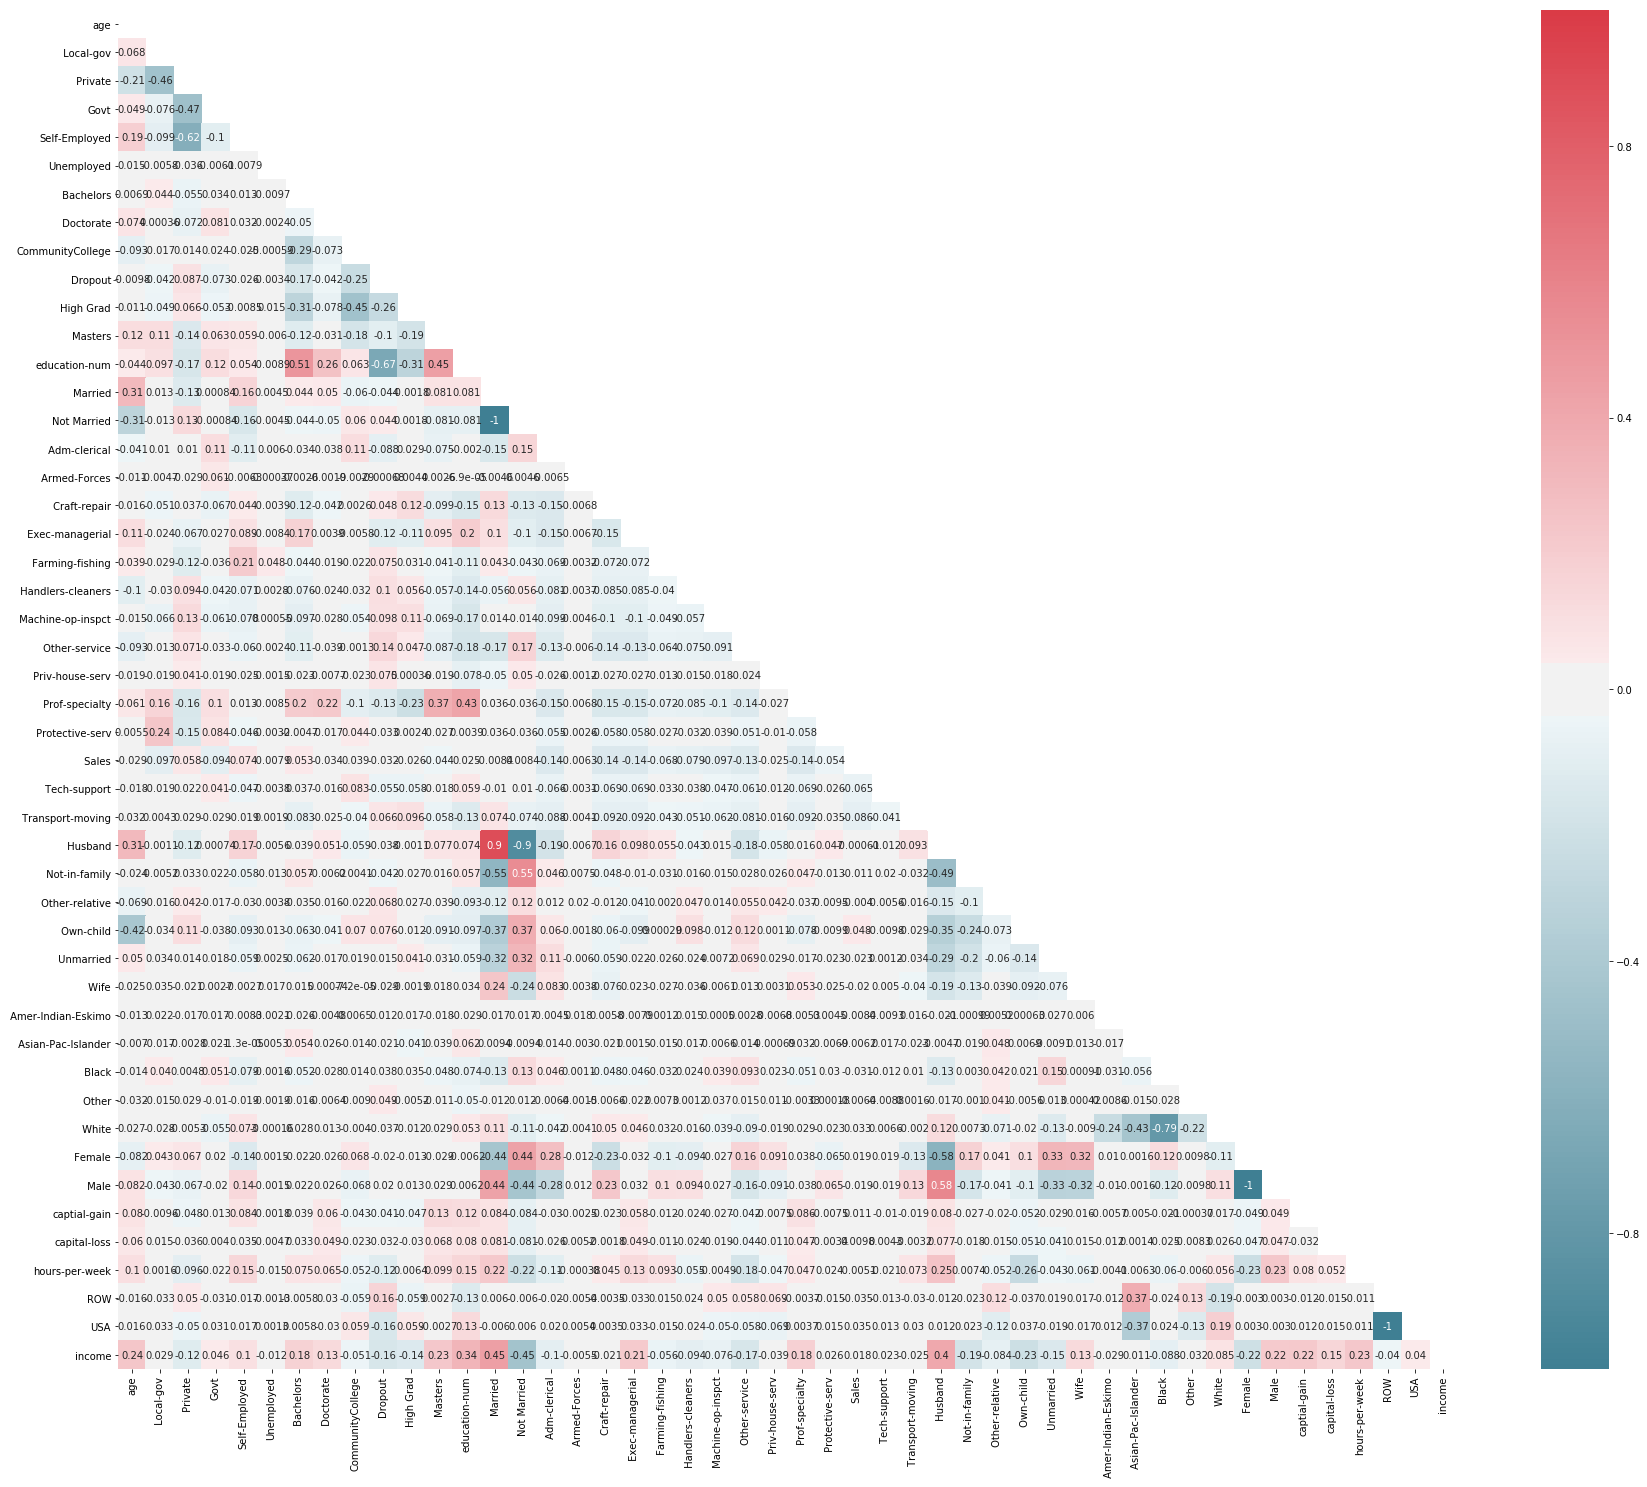

In [164]:
#Plotting the correlation heatmap

#Compute the correaltion matrix
corr = df_new.corr()

fif,ax = plt.subplots(figsize=(30,25))

#Generating mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#Generate the correaltion heatmap
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True)

In [165]:
corr['income'].sort_values(ascending = False)

income                 1.000000
Married                0.446110
 Husband               0.401236
education-num          0.335286
age                    0.241998
Masters                0.232721
hours-per-week         0.229480
captial-gain           0.221196
 Male                  0.216699
 Exec-managerial       0.213442
 Prof-specialty        0.181458
 Bachelors             0.178847
capital-loss           0.150053
 Doctorate             0.129162
 Wife                  0.125126
Self-Employed          0.100748
 White                 0.084735
Govt                   0.045758
USA                    0.040204
 Local-gov             0.028673
 Protective-serv       0.026360
 Tech-support          0.022829
 Sales                 0.018450
 Asian-Pac-Islander    0.011394
 Armed-Forces         -0.005506
Unemployed            -0.012406
 Craft-repair         -0.021445
 Transport-moving     -0.024944
 Amer-Indian-Eskimo   -0.029426
 Other                -0.032104
 Priv-house-serv      -0.038618
ROW     

Firstly getting rid of the attributes that have least correlation with the data such as Private, Unemployed, CommunityCollege, Dropout, Other, etc. as mentioned in the above correlation table.

In [29]:
df_final = df_new.drop([' Private','Unemployed', 'CommunityCollege', 'Dropout', ' Other', 'ROW', ' Own-child',
                                 ' Not-in-family', ' Other-service', ' Unmarried', ' Adm-clerical', ' Handlers-cleaners',
                                 ' Black', ' Other-relative', ' Machine-op-inspct', ' Farming-fishing', ' Priv-house-serv',
                                 ' Asian-Pac-Islander',' Armed-Forces', 'Unemployed', 'Not Married', ' Craft-repair',
                                  ' Transport-moving', ' Amer-Indian-Eskimo', ' Wife', ' White', 'Self-Employed', 'Married', 
                                  'education-num', ' Tech-support'], axis=1)

df_final.shape

(30162, 19)

So we have got rid of the categorical data and removed the unwanted columns from our dataset. Now lets split this data to training and test sets.

In [30]:
#Resetting the dataset indices
df_final = df_final.reset_index(drop = True)

### Partition Data

Using the Partition function that I described previously:

In [31]:
# Define Independent variables and dependent variables

X_CL = df_final.iloc[:,:-1]
T_CL = df_final.iloc[:,-1:]

print("X.shape = {} \nT.shape = {}".format(X_CL.shape, T_CL.shape))

X.shape = (30162, 18) 
T.shape = (30162, 1)


In [32]:
X_ctr, X_cts, T_ctr, T_cts = partition(X_CL, T_CL, train_ratio = 0.8 )

print(X_ctr.shape, X_cts.shape, T_ctr.shape, T_cts.shape)

(24129, 18) (6033, 18) (24129, 1) (6033, 1)


In [33]:
X_ctr = X_ctr.reset_index(drop=True)
X_cts = X_cts.reset_index(drop=True)
T_ctr = T_ctr.reset_index(drop=True)
T_cts = T_cts.reset_index(drop=True)

In [34]:
#Converting dataframes to numpy arrays
X_train_c = X_ctr.values
X_test_c = X_cts.values
T_train_c = T_ctr.values
T_test_c = T_cts.values

###### These are still pandas dataframes not numpy arrays. I will convert them as per the each of the algorithm requirement.

# Method

### Summary of Non-Linear Regression

Any non-linearity from the input to output makes the network non-linear. A Neural Network has got non-linear activation layers which is what gives the Neural Network a non linear element. A non-linear regression model comprises of hidden layers and output layers. In the hidden units, we backpropogate the error and update the weights. The activation function for hidden units can be hyperbolic tangent or sigmoid function.However, the activation function for the output layer is Linear as the prediction will be continuous.

A simple one hidden layer neural network with $ h(x) $ as activation function can be mathematically represented as:

$$
Y = W_2 h ( (W_1 x + b_1) + b_2 )
$$

The forward pass in non-linear regression is calculation of weights and bias for the hidden layer and the output layer:
$$
\begin{align}
\\
\Zm &= h(\Xlm \cdot \Vm) \\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

Our goal in training is to find the best set of weights and bias to minimize the loss function. To find the appropriate weights and bias, we find the derivative of the loss function with respect to the weights and biases, called Gradient Descent.
To summarize, the backpropagation performs this weight updates iteratively:  
$$
\begin{align}
\\
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\\
\end{align}
$$

where $\rho_h$ and $\rho_o$ are the learning rate for hidden and output layer weights. 

### Explaination of codes (Non-Linear Regression)

**"NeuralNet"** is the Neural Network class of Non Linear Regression which consists of various paramters,attributes and methods.

###### Parameter
nunits $\rightarrow$ This is a list which consists of the number of inputs, hidden units, and outputs
Example for this dataset, we have 21 attributes and 1 output atribute. Hidden units is our choice based on our model, so we will pass [21,5,1]

###### Methods

Describing the important methods of Non-Linear Regression Model:

**add_ones** $\rightarrow$ This method is to add the column of ones to the dataset to make it suitable for matrix multiplication whrn we add bias.

**get_nlayers** $\rightarrow$ This method returns the member variable self._nLayers.

**set_hunit** $\rightarrow$ This method is to update and initialize the weights. We copy the weights w to another variable _W s that we don't create bindings between a target and an object variable.

**pack & unpack** $\rightarrow$ These two methods are to create 1-D vector of weight matrix or vice versa.

**cp_weight** $\rightarrow$ To avoid bindings between a target and an object variable.

**RBF** $\rightarrow$ This method is optional, this is to change the activation function if needed. However, we will be using $tanh$ as activation function for this neural network model.

**forward** $\rightarrow$ This method is for the forward pass as we discussed so far in our dervations. It calculates the weights for hidden and output layer.

**backward** $\rightarrow$ This method is for the backward propogation part of the algorithm. It updates the weights on the basis of loss function and returns a 1-D vector dws with the list of gradients. We start from the last layer and propogate backwards by -1.

**errorf & objectf** $\rightarrow$ These are the error functions that we want to minimize.

**gradientf** $\rightarrow$ This method computes the gradient of each hidden unit and the output unit using the forward, backward and errorf methods which we described above.

**train & use** $\rightarrow$ These methods are used to apply non linear regression on the dataset. We train our model by passing X & T train data and compute the weights and bias for the model. This computed weights is used by _use_ method to predict the values of test dataset.

**Note** :   Variable _W are the weights & variable _weights are weights in one dimension (_W is referencing _weight)

### Implementation 

In [35]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
import numpy as np
import matplotlib.pyplot as plt
from grad import scg, steepest
from copy import copy
from util import Standardizer


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
    
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

Let us apply Non-Linear Regression with 5 hidden units to test out our model. I will test out hyperparameters using 5-fold Cross Validation in the following section.

In [36]:
nn = NeuralNet([X.shape[1],5,T.shape[1]])
nn.train(X_train,T_train)
Y_pred_nn = nn.use(X_test)
Y_pred_nn

array([[128.27813883],
       [188.63655451],
       [261.70409335],
       ...,
       [590.68385416],
       [ 18.01829196],
       [ 33.24722833]])

In [37]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

In [38]:
rmse(T_test, Y_pred_nn)

1158.8156374866064

In the next section, we will use **K-Fold Cross Validation** to find out best parameters for our Non-Linear Regression Model.

### Summary of CV & correctness of implementation

Cross Validation (CV) is a resampling procedure used to evaluate machine learning models. Cross-validation is a statistical technique which involves partitioning the data into subsets, training the data on a subset and use the other subset to evaluate the model’s performance. To reduce varation we perform multiple rounds of cross-validation with different subsets from the same data. We combine the validation results from these multiple rounds to come up with an estimate of the model’s predictive performance. The number of rounds is defined as $k$ and hence it is popularly known as **K-Fold Cross Validation**. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

We partition data into k splits out of which one is used for test, one for validation and rest of splits are used for training the model. We evaluate the model and store the validation results in a list. Once we are done with trying all the possible combinations in K-Fold CV, we find out the model with best result in the list and apply the model with the best parameters to our test dataset. 

<img src="cv.jpg" width=600 />


<center>Image Source [2] </center>

### Implementation of CV

In [113]:
#Importing ParameterGrid to make a list of all possible hyperparameters
from sklearn.model_selection import ParameterGrid
from nn import NeuralNet

#Define KFold Cross Validation
def KFoldCV(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    
    # Define a lists to store results
    best_params = []
    test_error = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        min_error = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end ="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_error = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    non_lin_reg = NeuralNet([X.shape[1], nunit, T.shape[1]])
                    non_lin_reg.train(X_Train,T_Train, **grid_list[k])
                    Y_Pred = non_lin_reg.use(X_Validate)
                    validation_error.append(rmse(T_Validate, Y_Pred))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_error [k] < validation_error[k-1]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            
            print(" Completed")
            min_error.append(min_validation_error)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the minimum error after all validations in each fold
        min_error_idx = min_error.index(min(min_error))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[min_error_idx] 
        nunit = nunits_best[min_error_idx]
        print("Minimum Validation Error : {}".format(min(min_error)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        non_lin_reg = NeuralNet([X.shape[1], nunit, T.shape[1]])
        non_lin_reg.train(X_remain,T_remain, **hp)
        Y_Pred_test = non_lin_reg.use(X_Test)
        test_error.append(rmse(T_Test, Y_Pred_test))
        
    print(test_error)
    return test_error

In [235]:
test_error = KFoldCV(X_train, T_train, 5)

####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 1642.0968625222647
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 0.001, 'niter': 100, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 1642.8329174287378
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 0.001, 'niter': 100, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 1643.1063033479813
Best Parameters for Fold 

Let us find out the least validation error from the above Cross Validation results and find out the parameters which provide the least errors.

We got the least error of 954.66 after we ran all the possible combinations of hyper parameters using 5-fold Cross Validation.

So, after running all the experiments, here is the summary of best parameters for our dataset:

optim = 'scg'   
niter = 500   
_lambda = 0.001  
hidden units = 20  

We will use these hyperparamters for Non-Linear Regression and retrain our model.

In [41]:
#Apply Non-Linear Regression with CV parameters

nonLinReg = NeuralNet([X.shape[1],20,T.shape[1]])
nonLinReg.train(X_train,T_train,optim='scg', niter = 500, _lambda= 0.001)
Y_pred_nonLinReg = nonLinReg.use(X_test)
rmse(T_test, Y_pred_nonLinReg)

1007.4039930683798

We will plot the results in the result section.

### Summary of Non-Linear Logistic Regression

Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

Linear logistic regression uses the softmax layer for classification along with a linear model.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

We use this softmax function to generate probabilities of each class. Also, we use the indicator target labels for training to update the weights for the linear model.

Update Rule:
$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

The error function for the Logistic Regression is the negative logarthmic likelihood and given by:
$$
E(w) = - \ln P(T | w) = - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}
$$

We can extend this model to neural networks and we can derive the gradient by switching the squuared error with the negative log likelihood function above.

$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}}
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$.

The weight update for hidden layer and the output layer in matrix form is given as:
$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

$$
\Wm \leftarrow \Wm + \rho_o \Zlm^\top \Big( \Tm - G \Big)
$$

This is the Non-Linear Logistic Regression Model.

### Explaination of codes (Non-Linear Logistic Regression) 

NeuralNetLogReg class inherits the NeuralNet class that we used for Non-Linear Regression. We will be redefining the forward, train, use and error function methods as per the weight updates we defined in the previous section.

This block consists of all classes and methods for Non-Linear Logistic Regression. The implementation of Non-Linear Logistic Regression is extension of Non-Linear Regression and it inherits the methods of NeuralNet Class that we described above. However, as in logistic regression we use softmax function to get the output probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

**softmax** $\rightarrow$ We define the softmax function to evaluate the probabilites of each class in the range 0 to 1.

**forward** $\rightarrow$ We inherit the forward function of the NeuralNet Class and use the output of the final layer to get the probabilites of each class using softmax function.

**_objectf** $\rightarrow$ For Logistic Regression, the error function is the negative of log likelihood. (No changes requires in the _error function as the softmax function is already applied to the output from forward function)

**train** $\rightarrow$ One of the important requirement to run this algorithm is to convert the target variable to **_Indicator Matrix_**. This is done using One Hot Encoder. Once we get the indicator matrix, we inherit the train function from NeuralNet Class.

**use** $\rightarrow$ Forward function returns the probabilites of each class. We use argmax to predict the class of target variable. We return both the probabilites as well as the class of target variable.

### Correct implementation (Non-Linear Logistic Regression)
**(Examination of correct implementation with toy data.)**


In [42]:
from sklearn.preprocessing import OneHotEncoder
from nn import NeuralNet
#np.seterr(divide='ignore', invalid='ignore')

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def __init__(self,nunits):
        NeuralNet.__init__(self,nunits)
    
    #Define the softmax function
    def softmax(self, z):
        f = np.exp(z)
        return (f / np.sum(f, axis=1, keepdims=True))

    #Forward Pass
    def forward(self, X):
        t, Z = super().forward(X)
        y = self.softmax(t)
        return y,Z

    #Error Function that we aim to minimize - Log Likelihood
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum( np.sum((T * np.log(Y)) , axis=1), axis=0)) + wpenalty
        #return np.sum(-T*np.log(Y)-(1-T)*np.log(1-Y))+wpenalty

    #Train Function - Converting target variable to Indicator Matrix and inheriting train from Superclass
    def train(self, X, T, **params):
        onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
        T1 = onehot_encoder.fit_transform(T)
        result = super().train(X,T1,**params)
        return result
        
     #Use Function for the test set 
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        classes = np.argmax(Y, axis = 1)
        return classes,Y

#### Generating some toy synthetic data to test Non-Linear Logistic Regression

Text(0.5, 1.0, 'test data set')

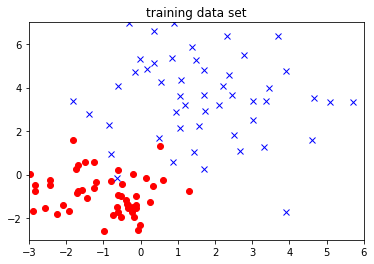

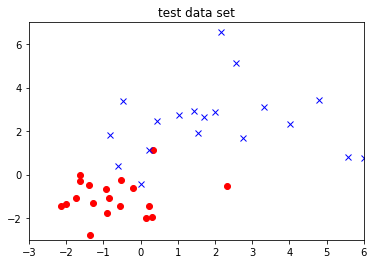

In [45]:
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [48]:
#Define Accuracy to test the Classification results
def Accuracy(T,Y):
    return 100 - np.mean(np.abs(T - Y)) * 100

In [46]:
# Apply Nonlinear Logistic Regression

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain, _lambda = 0.001)
classes, Y = clsf.use(Xtest)
classes, Y

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([[1.00000000e+000, 4.19637554e-114],
        [1.00000000e+000, 4.19635008e-114],
        [1.41800532e-069, 1.00000000e+000],
        [1.00000000e+000, 4.19635008e-114],
        [1.00000000e+000, 4.19635123e-114],
        [1.00000000e+000, 4.19635008e-114],
        [1.00000000e+000, 4.19635015e-114],
        [1.00000000e+000, 4.19635008e-114],
        [1.00000000e+000, 4.19635010e-114],
        [1.00000000e+000, 4.19635008e-114],
        [1.00000000e+000, 4.19635008e-114],
        [1.00000000e+000, 4.20713628e-114],
        [1.00000000e+000, 4.19635505e-114],
        [1.00000000e+000, 4.19635797e-114],
        [1.00000000e+000, 4.19635013e-114],
        [1.00000000e+000, 4.19856620e-114],
        [1.00000000e+000, 4.19635009e-114],
        [1.00000000e+000, 4.19635130e-114],
        [1.67719749e-069, 1.00000000e+000],
        [1.00

Accuracy:  50.0 %


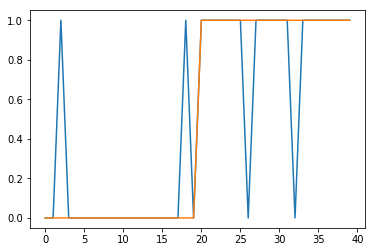

In [49]:
plt.plot(classes)
plt.plot(Ttest)


print("Accuracy: ", Accuracy(Ttest,classes), "%")

#### Apply Non-Linear Logistic Regression to my Classification Data

In [50]:
X_train_c.shape, T_train_c.shape, X_test_c.shape, T_test_c.shape

((24129, 18), (24129, 1), (6033, 18), (6033, 1))

In [51]:
#Apply Non-Linear Logistic Regression to Adult Income Dataset with 5 hidden units
nnLogRes = NeuralNetLogReg([18, 5, 2])
nnLogRes.train(X_train_c,T_train_c)
cls, Y_pred_nnLog = nnLogRes.use(X_test_c)

In [52]:
print("Accuracy: ", Accuracy(T_test_c,cls), "%")

Accuracy:  50.77657996220522 %


#### Apply 5-fold Cross Validation to find out best hyperparamters for Non-Linear Logistic Regression Model

The implementation is identical to K-Fold Cross Validation implementation done in previous section for Non-Linear Regression. The only difference here is we track the maximum accuracy instead of rmse error. We can use other scores as F1, Precision, Recall or RUC-AOC but I am here only evaluating Accuracy to keep this model simple.

In [236]:
#Importing ParameterGrid to make a list of all possible hyperparameters
from sklearn.model_selection import ParameterGrid
from nn import NeuralNet


#Define KFold Cross Validation
def KFoldCV_LR(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class    
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001, 2e-5]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    # Define a lists to store results
    best_params = []
    test_accuracy = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        max_accuracy = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_accuracy = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    nnLR = NeuralNetLogReg([X.shape[1], nunit, (T.shape[1]+1)])
                    nnLR.train(X_Train,T_Train, **grid_list[k])
                    cl,Y_Pred = nnLR.use(X_Validate)
                    validation_accuracy.append(Accuracy(T_Validate, cl))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_accuracy [k] > validation_accuracy[k-1]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            print(" Completed")
            max_accuracy.append(max_validation_accuracy)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the maximum accuracy after all validations in each fold
        max_accuracy_idx = max_accuracy.index(max(max_accuracy))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[max_accuracy_idx] 
        nunit = nunits_best[max_accuracy_idx]
        print("Max Accuracy : {}".format(max(max_accuracy)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        nnLR = NeuralNetLogReg([X.shape[1], nunit, (T.shape[1]+1)])
        nnLR.train(X_remain,T_remain, **grid_list[k])
        cl,Y_Pred = nnLR.use(X_Test)
        test_accuracy.append(Accuracy(T_Test, cl))
        
    print("\nTest Accuracies : ", test_accuracy, "\n Maximum Accuracy :", max(test_accuracy))

In [233]:
test_accuracy = KFoldCV_LR(X_train_c,T_train_c,5)

{'_lambda': 1, 'niter': 100, 'optim': 'scg'}
####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 67.23272248919434
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 2e-05, 'niter': 500, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 63.72966791054793
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 2e-05, 'niter': 500, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 73.46297618728019
Best Parameters for

We got the Maximum Accuracy of 58.08 % after we ran all the possible combinations of hyper parameters using 5-fold Cross Validation for Non-Linear Logistic Regression Model.

So, after running all the experiments, here is the summary of best parameters for our dataset:

optim = 'scg'   
niter = 200   
_lambda = 2e-5    
hidden units = 20    

We will re-train the model with these params and evaluate accuracy of our model.

In [62]:
#Re-train the model with best hyper parameters
nnLogRes = NeuralNetLogReg([18, 20, 2])
nnLogRes.train(X_train_c,T_train_c, optim = 'scg', niter = 1000, _lambda = 2e-5)
cls, Y_pred_nnLog = nnLogRes.use(X_test_c)

In [63]:
print("Accuracy: ", Accuracy(T_test_c,cls), "%")

Accuracy:  59.06806448175018 %


# Results

### Presentation of CV results

We ran both the models with and without Cross Validation. Our aim was to improve the models by tuning the hyperparameters and finding the best combination of number of units, iterations and lambda. I tried all the possible combinations and evaluate the validation set, then use the best hyperparameters of least error on test set. And, finally use the parameters that yielded least errors for the test set. This process was done was all the possible splits. 

Here is the summary of CV Results:

#### Non-Linear Regression

**Least Validation RMSE is the least rmse of all the four validation sets tried in one fold.**

<table style="width:75%">
  <tr>
    <th>Fold</th>
    <th>Least Validation RMSE</th> 
    <th>Test RMSE</th>
  </tr>
  <tr>
    <td>1</td>
    <td>1642.09</td> 
    <td>1108.97</td>
  </tr>
  <tr>
    <td>2</td>
    <td>1642.83</td> 
    <td>1077.89</td>
  </tr>
   <tr>
    <td>3</td>
    <td>1643.10</td> 
    <td>954.66</td>
  <tr>
    <td>4</td>
    <td>1644.10</td> 
    <td>1099.02</td>
  </tr>
  <tr>
    <td>5</td>
    <td>1644.04</td> 
    <td>1167.96</td>
  </tr>
</table>

We pick the hyperparameters which provide the least RMSE for test set i.e. Fold 3. It provides RMSE of 954.66 and the hyper parameters for this result were :

|**Params**    | **Value**    |
|--------------|--------------|
|nunits        |    20        |
|niter         |    500       |
|_lambda_      |    0.001     |
|optim         |    'scg'     |


#### Non-Linear Logistic Regression

**Maximum Validation Accuracy is the max accuracy of all the four validation sets tried in one fold.**

<table style="width:75%">
  <tr>
    <th>Fold</th>
    <th>Maximum Validation Accuracy</th> 
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>1</td>
    <td>67.23 %</td> 
    <td>54.25 %</td>
  </tr>
  <tr>
    <td>2</td>
    <td>63.72 %</td> 
    <td>57.99 %</td>
  </tr>
   <tr>
    <td>3</td>
    <td>73.46 %</td> 
    <td>58.08 %</td>
  <tr>
    <td>4</td>
    <td>65.99 %</td> 
    <td>54.58 %</td>
  </tr>
  <tr>
    <td>5</td>
    <td>68.07 %</td> 
    <td>52.18 %</td>
  </tr>
</table>

We pick the hyperparameters which provide the maximum accuracy for test set i.e. Fold 3. It provides accuracy of **58.08 %** and the hyper parameters for this result were :  

|**Params**    | **Value**    |
|--------------|--------------|
|nunits        |    20        |
|niter         |    200       |
|_lambda_      |    2e-5      |
|optim         |    'scg'     |


### Discussions about parameter/network structure choice

It is difficult as well equally important to find the a neural network with optimal parameters. The most important of being all is layers and units. Every Neural Network has three layers :

* Input Layer  - Every NN has exactly one input layer
* Output Layer - Every NN has exactly one output layer
* Hidden Layer - This is the most difficult choice in a NN. We have tried hidden units and recorded the score and chose the best one to re-train our model.

Before we build a model we need to pick a metric based on which we will be optimizing our neural network. I have choosen RMSE for Non-Linear Regression and Accuracy as metric for Non-Linear Logistic Regression. However, we had other options, but I chose to optimize based on these metrics.

If our dataset is Linearly separable, then we don't really need NN, which is equivalent to running NN with one hidden layer. The optimal size of hidden units in a Linearly unseparable model is somewhere between size of input and size of output. In both of my models, I have used two hidden layer and played around the number of hidden units. Using less number of neurons results in Underfitting, when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set. Similarly, using too many neurons results in Overfitting. There is no specific formula to decide neurons in each layer. It depends on the dataset. To avoid Overfitting & Underfitting, I used 5-fold Cross Validation for both Regression & Logistic Regression Models. Based on the CV results, we picked the parameters with least error and maximum accuracy for our models.

Here is an experiment to demostrate choosing hidden units done for Non-Linear Regression:

RMSE Errors :  [1814.9891314771542, 1741.4931250467314, 1186.9459543871722, 1150.8928316187935, 1025.459808425532, 1038.1380119115763, 1038.3499591982493, 1042.1753113210882]

Least RMSE : 1025.459808425532  with 20 hidden units 


Text(0, 0.5, 'RMSE')

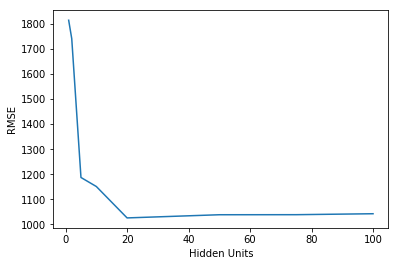

In [254]:
#Hidden Units to be tested
hidden_units = [1,2,5,10,20,50,75,100]

#Store the RMSE with each hidden unit
rmse_hu = []

#Apply and train Non-Linear Regression
for i in hidden_units:
    nonLinReg = NeuralNet([X.shape[1],i,T.shape[1]])
    nonLinReg.train(X_train,T_train,optim='scg', niter = 500, _lambda = 0.001)
    Y_pred_nonLinReg = nonLinReg.use(X_test)
    rmse_hu.append(rmse(T_test, Y_pred_nonLinReg))

print("RMSE Errors : ", rmse_hu)
print()
print("Least RMSE : {}  with {} hidden units ".format(min(rmse_hu), hidden_units[rmse_hu.index(min(rmse_hu))]))

#Plotting the results
plt.plot(hidden_units, rmse_hu)
plt.xlabel('Hidden Units')
plt.ylabel('RMSE')

I observed that the RMSE is higher with lesser hidden units 1,2 and 5. With 10 hidden units, it doing alright. However, with 20 hidden units we achieve the least RMSE. And we go beyond 20, RMSE starts to increase again (which depicts overfitting). Hence, for our Bike Dataset, we found the good balance of hidden units at 20 (Below 20 our model is Underfitted and beyond 20 it starts to overfit). This is how we tune the hyper parameters for our neural network.

## Plots for results

#### CV Results

Text(0, 0.5, 'Accuracy')

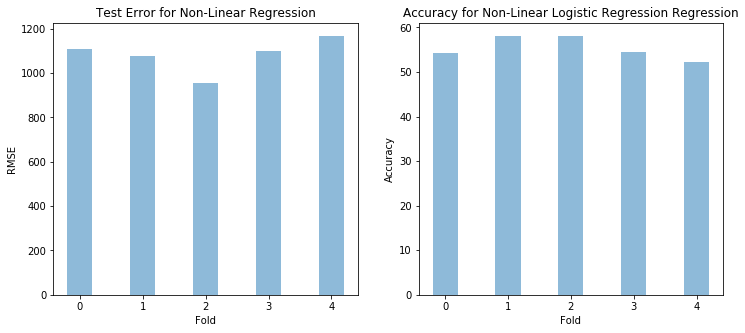

In [352]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(np.arange(5),test_error, alpha=0.5, width=0.4)
plt.xticks(np.arange(5))
plt.title("Test Error for Non-Linear Regression")
plt.xlabel('Fold')
plt.ylabel('RMSE')


plt.subplot(1,2,2)
plt.bar(np.arange(5),test_accuracy, alpha=0.5, width=0.4)
plt.xticks(np.arange(5))
plt.title("Accuracy for Non-Linear Logistic Regression Regression")
plt.xlabel('Fold')
plt.ylabel('Accuracy')


##### Non-Linear Regression Results

Text(0.5, 0, 'Hour')

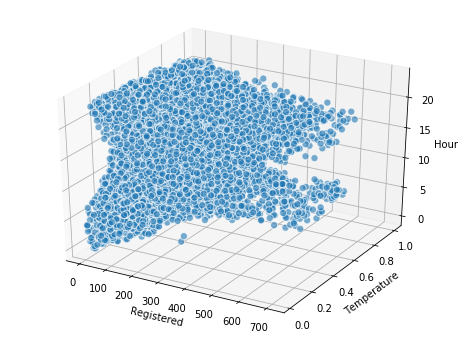

In [75]:
# Visualizing 3-D numeric data with Scatter Plots
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = X_tr['registered']
ys = X_tr['temp']
zs = X_tr['hr']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Registered')
ax.set_ylabel('Temperature')
ax.set_zlabel('Hour')

Text(0.5, 1.0, 'Scatter Plot for Least Squares (Registered Users)')

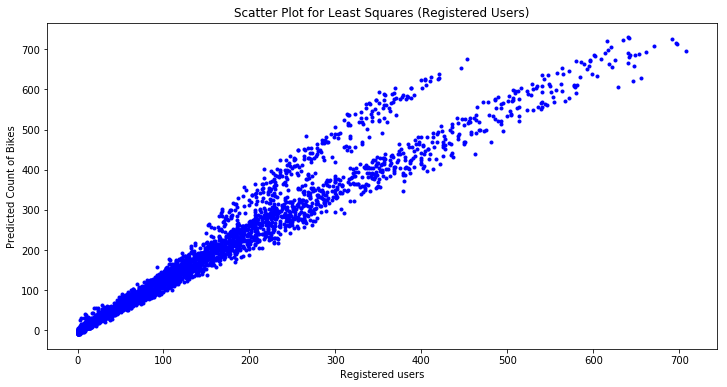

In [83]:
#Plotting the highest correlated attribute VS Predicted Results
plt.figure(figsize=(12,6))
plt.plot(X_ts.iloc[:,-1:], Y_pred_nn, 'b.')
plt.xlabel("Registered users",fontsize=10)
plt.ylabel("Predicted Count of Bikes",fontsize=10)
plt.title("Scatter Plot for Least Squares (Registered Users)",fontsize=12)

To visualise the results better, I am using a random subset of actual and predicted values to get inference from the plots.

Text(0, 0.5, 'Actual')

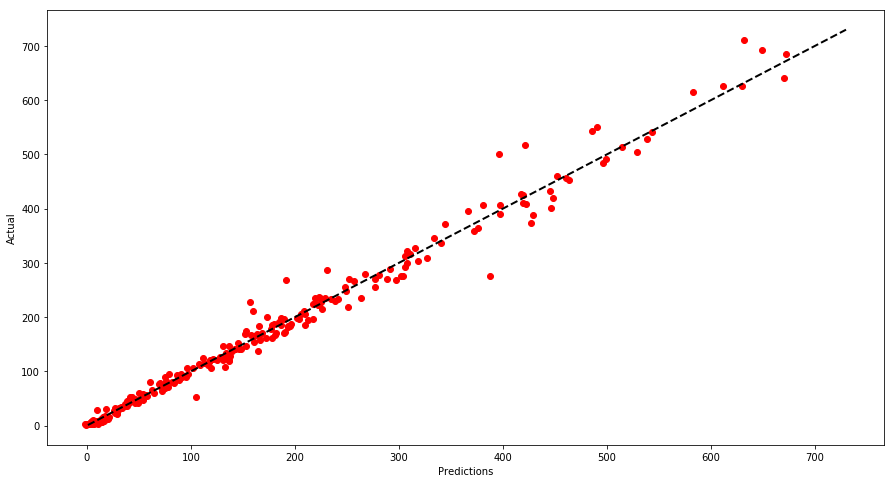

In [91]:
plt.figure(figsize=(15,8))
plt.plot(Y_pred_nonLinReg[2750:3000],T_test[2750:3000], 'ro')
plt.plot([T_test.min(), T_test.max()], [T_test.min(), T_test.max()], 'k--', lw=2)
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)

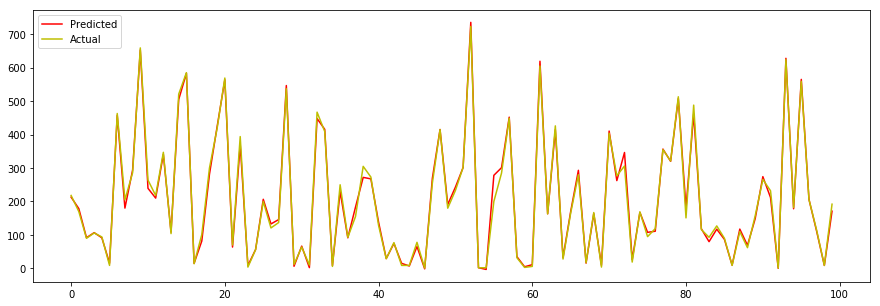

In [68]:
#Comapre Non-Linear Regression Results for some 100 data samples
plt.figure(figsize=(15,5))
plt.plot(Y_pred_nonLinReg[500:600],'r')
plt.plot(T_test[500:600],'y')
plt.legend(('Predicted','Actual'),loc='upper left')

#### Non-Linear Logistic Regression Results

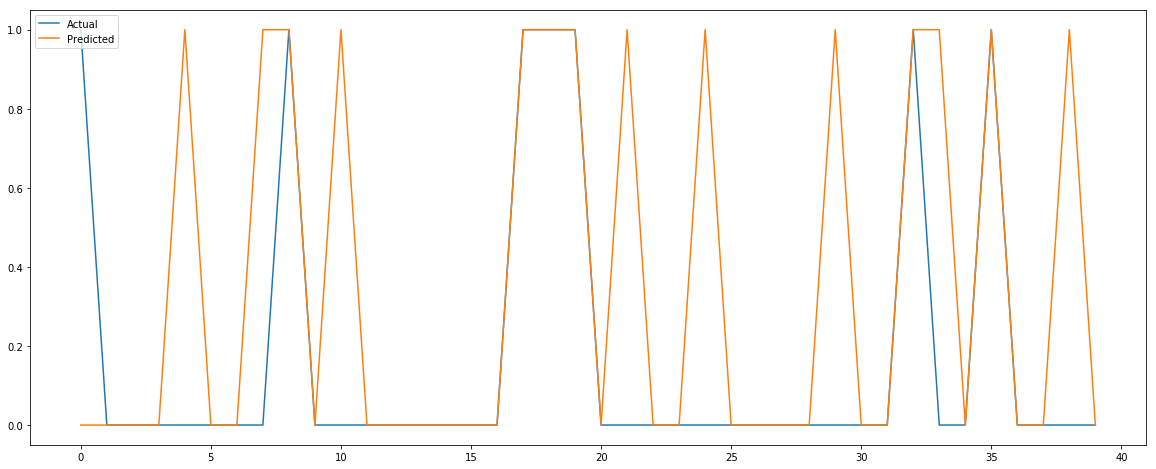

In [69]:
#Visualising Test results from Non-Linear Logistic Regression
plt.figure(figsize=(20,8))
plt.plot(T_test_c[80:120])
plt.plot(cls[80:120])
plt.legend(('Actual','Predicted'),loc='upper left')

Confusion Matrix : 
 [[3687  779]
 [ 468 1099]]


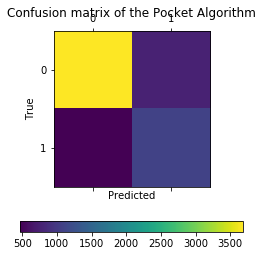

In [88]:
#Confusion Metrics for Non-Linear Logistic Regression

from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n" ,confusion_matrix(T_test_c,cls))

plt.matshow(confusion_matrix(T_test_c, cls))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the Pocket Algorithm')
plt.colorbar(orientation = 'horizontal')

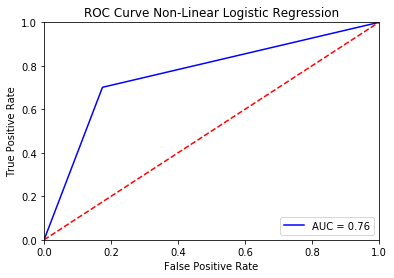

In [90]:
#ROC-AUC for the Non-Linear Logistic Regression

from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(T_test_c, cls)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve Non-Linear Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Discussion about the prediction results

A basic 3-layer backpropogation model looks like this :

<img src="ann.jpg" width=600 />


<center>Image Source [3] </center>

The nodes are linked by connections which have a "weight" ("w" in the figure). Our model used feedforward and backpropogation to compute the optimal weights for the network. After each layer, it computes the weight and find out the error using backpropogation. The error values are propagated backward through the network using backpropogation that tells the algorithm how to modify each connection weight so that the network improves the next time. The output layer combines the results from hidden layers and provide the final prediction. The only difference between Logistic Regression and Regression was the use of softmax function to evaluate the probabilities of each class and converting the target varibale to Indicator Matrix.

#### Activaton Function
Neuron provides an output by applying the function on the inputs provided. The function used in a neuron is generally termed as an activation function. We have used hyperbolic tanget as our Activation Function for both the models.

It is very easy to achieve a very high accuracy while training our data using dense neural networks but these might not generalize well to our validation and test set. Also if we inhibit from using deep/complex architectures there is always a chance of having low accuracy on our data-sets, hence we need to find the sweet spot which generalizes well and has a high accuracy. Every hyper-parameter effects the bias-variance. I avoided this by tuning hyper parameters such as hidden units, learning rate and number of epochs. We could have tried various activation function as well, for now all these models were built using _Hyperbolic Tanget_ as Activation Function. So, this is how we built our models!


# Extra Analysis for Activation Functions

Activation Function are very important in a Artificial Neural Network as they introduce non-linear properties to our network. Their main purpose is to convert a input signal of a node in a NN to an output signal. That output signal now is used as a input in the next layer in the stack. We do the dot product of input X and the corresponding weights w and apply the Activation Function to it to get the output of that layer and feed it as an input to the next layer. If we don't use an activation function, then our model would be a simple linear model with degree 1. A Neural Network without Activation function would simply be a Linear regression Model, which has limited efficiency and does not perform good most of the times. Also, activation functions are differentiable which is required to perform backpropogation optimization strategy while propogating backwards in the network to compute gradients of Error(loss) with respect to Weights and then accordingly optimize weights using Gradient descend or any other Optimization technique to reduce Error.

There are Three Main popular choices of Activation Functions in Neural Network:

* Tanh - Hyperbolic Tangent
* Sigmod or Logistic
* ReLU - Rectified Linear Units

## Sigmoid Function

A sigmoid function is of the form :
$$
\sigma(x) = \frac {1} { 1 + e^{-x}}
$$

It's range is between 0 and 1.

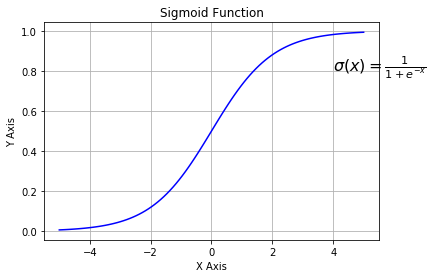

In [126]:
#Basic Sigmoid Function

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

#### Non-Linear Regression using Sigmoid Activation Function

In [111]:
#Creating another class for Sigmoid Activation Function

class NeuralNet_Sigmoid(NeuralNet):
    """ Nonlinear Regression with Sigmoid Activation Fucntion
        
        Inherits the NeuralNet Class and has additional Sigmoid Function and forward method.
    """

    def __init__(self,nunits):
        NeuralNet.__init__(self,nunits)
    
   
    def sigmoid(self,X):
        return 1 / ( 1 + np.exp(-X))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.sigmoid(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

In [112]:
#Apply Non-Linear Regression with the best CV parameters of previous tests with Hyperbolic Tangent Activation Function

nonLinReg_sigmoid = NeuralNet_Sigmoid([X_train.shape[1],20,T_train.shape[1]])
nonLinReg_sigmoid.train(X_train,T_train,optim='scg', niter = 500, _lambda= 0.001)
Y_pred_nonLinReg_sigmoid = nonLinReg_sigmoid.use(X_test)
rmse(T_test, Y_pred_nonLinReg_sigmoid)

4523.69587827555

#### K Fold Cross Validation for Non-Linear Sigmoid Regression

In [117]:
#Define KFold Cross Validation for Non-Linear Sigmoid  Regression
def KFoldCV_Sigmoid(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    
    # Define a lists to store results
    best_params = []
    test_error = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        min_error = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end ="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_error = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    non_lin_reg = NeuralNet_Sigmoid([X.shape[1], nunit, T.shape[1]])
                    non_lin_reg.train(X_Train,T_Train, **grid_list[k])
                    Y_Pred = non_lin_reg.use(X_Validate)
                    validation_error.append(rmse(T_Validate, Y_Pred))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_error [k] < validation_error[k-1]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            
            print(" Completed")
            min_error.append(min_validation_error)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the minimum error after all validations in each fold
        min_error_idx = min_error.index(min(min_error))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[min_error_idx] 
        nunit = nunits_best[min_error_idx]
        print("Minimum Validation Error : {}".format(min(min_error)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        non_lin_reg = NeuralNet_Sigmoid([X.shape[1], nunit, T.shape[1]])
        non_lin_reg.train(X_remain,T_remain, **hp)
        Y_Pred_test = non_lin_reg.use(X_Test)
        test_error.append(rmse(T_Test, Y_Pred_test))
        
    print(test_error)
    return test_error

In [144]:
#Applying 5-fold Cross Validation for this model

test_errs_sig = KFoldCV_Sigmoid(X_train,T_train,5)

####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 2007.2637279086978
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 0.001, 'niter': 500, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 3685.3289171748243
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 0.001, 'niter': 200, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 3809.923126061564
Best Parameters for Fold 3

##### Least RMSE of 1961.73  
##### Hyper paramters: nunits :  20  {'_lambda': 0.001, 'niter': 1000, 'optim': 'scg'}    

In [151]:
#Re-ruuning with best parameters of CV results for Sigmoid Acivation Function

non_lin_reg_sigmoid = NeuralNet_Sigmoid([X_train.shape[1], 20, T_train.shape[1]])
non_lin_reg_sigmoid.train(X_train,T_train,optim='scg', niter = 1000, _lambda= 0.001 )
Y_pred_nn_sigmoid = non_lin_reg_sigmoid.use(X_test)
rmse(T_test, Y_pred_nn_sigmoid)

2327.3293249332637

#### Non-Linear Logistic Regression using Sigmoid Activation Function

In [149]:


class NeuralNetLogReg_Sigmoid(NeuralNetLogReg):
    """ 
        Nonlinear Logistic Regression with Sigmoid Activation Fucntion
        
        Inherits the NeuralNetLogReg Class and has additional Sigmoid Function and forward method.
    """

    def __init__(self,nunits):
        NeuralNetLogReg.__init__(self,nunits)
        
    def sigmoid(self,X):
        return 1 / ( 1 + np.exp(-X))
    
    #Forward Pass
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.sigmoid(np.dot(self.add_ones(t), self._W[i]))
        y = self.softmax(t)
        return y,Z


In [150]:
#Apply Non-Linear Logistic Regression with the best CV parameters of previous tests with Hyperbolic Tangent Activation Function
nnLogRes_Sigmoid = NeuralNetLogReg_Sigmoid([18, 20, 2])
nnLogRes_Sigmoid.train(X_train_c,T_train_c, optim = 'scg', niter = 1000, _lambda = 2e-5)
cls_sigmoid, Y_pred_nnLog_sigmoid = nnLogRes_Sigmoid.use(X_test_c)
print("Accuracy: ", Accuracy(T_test_c,cls_sigmoid), "%")

Accuracy:  25.973810707773907 %


#### K Fold Cross Validation for Non-Linear Sigmoid Logistic Regression

In [152]:
#Define KFold Cross Validation for Non-Linear Sigmoid  Logistic Regression

def KFoldCV_LR_Sigmoid(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class    
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001, 2e-5]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    # Define a lists to store results
    best_params = []
    test_accuracy = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        max_accuracy = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_accuracy = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    nnLR = NeuralNetLogReg_Sigmoid([X.shape[1], nunit, (T.shape[1]+1)])
                    nnLR.train(X_Train,T_Train, **grid_list[k])
                    cl,Y_Pred = nnLR.use(X_Validate)
                    validation_accuracy.append(Accuracy(T_Validate, cl))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_accuracy [k] > validation_accuracy[k-1]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            print(" Completed")
            max_accuracy.append(max_validation_accuracy)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the maximum accuracy after all validations in each fold
        max_accuracy_idx = max_accuracy.index(max(max_accuracy))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[max_accuracy_idx] 
        nunit = nunits_best[max_accuracy_idx]
        print("Max Accuracy : {}".format(max(max_accuracy)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        nnLR = NeuralNetLogReg_Sigmoid([X.shape[1], nunit, (T.shape[1]+1)])
        nnLR.train(X_remain,T_remain, **grid_list[k])
        cl,Y_Pred = nnLR.use(X_Test)
        test_accuracy.append(Accuracy(T_Test, cl))
        
    print("\nTest Accuracies : ", test_accuracy, "\n Maximum Accuracy :", max(test_accuracy))
    return test_accuracy

In [153]:
test_accuracy_sigmoid = KFoldCV_LR_Sigmoid(X_train_c, T_train_c,5)

####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 75.56133909635157
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 2e-05, 'niter': 500, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 75.68911917098445
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 0.001, 'niter': 500, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 75.68911917098445
Best Parameters for Fold 3 : nunits :  20  {'_lambda': 2e-05, 'n

##### Max Accuracy of  75.68%  
##### Hyper paramters: nunits :  20  {'_lambda': 2e-05, 'niter': 500, 'optim': 'scg'} 

In [155]:
#Re-running with best results of CV
nnLogRes_Sigmoid = NeuralNetLogReg_Sigmoid([18, 20, 2])
nnLogRes_Sigmoid.train(X_train_c,T_train_c, optim = 'scg', niter = 500, _lambda = 2e-05)
cls_sigmoid, Y_pred_nnLog_sigmoid = nnLogRes_Sigmoid.use(X_test_c)
print("Accuracy: ", Accuracy(T_test_c,cls_sigmoid), "%")

Accuracy:  74.02618929222609 %


##### Problems with Sigmoid Function

* Sigmoids saturate and kill gradients.
* Sigmoids have slow convergence.
* Vanishing Gradient Problem
* Output is not zero centered.

To solve these problems, we use **Hyperbolic Tangent Function**

## Hyperbolic Tangent (tanh)

It is given as:
$$
f(x) = \frac { 1 - e^{-2x} } { 1 + e^{-2x} }
$$

Output is zero centered because its range in between -1 to 1 i.e -1 < output < 1. Hence, optimization is easy when we use tanh as activation function.

I have already implemented both Non-Linear Regression and Logistic Regression using Hyperbolic Tangent function and explained all the analysis in the previous sections of this notebook. All the implementation done is Superclass NeuralNet has used hyperbolic tangent as Activation Function

## ReLU : Rectified Linear Unit

ReLU is the most commonly choice of activation function used now a days. It provides improvement in convergence compared to both Sigmoid and Hyperbolic Tangent Functions. Mathematically, it is defined as:
$$
y = max(0, x)
$$

ReLU is linear (identity) for all positive values, and zero for all negative values. It gets rid of the Vanishing Gradient Problem and hence more preferred over Sigmoid and tanh activation functions.

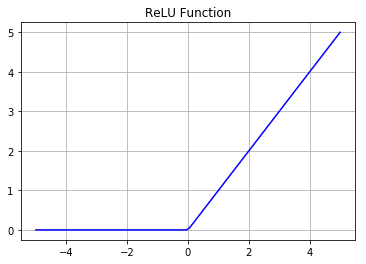

In [134]:
# Basic ReLU Function

def ReLU(x):
    return np.maximum(x,0)

X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.title('ReLU Function')
plt.grid()

#### Non-Linear Regression using ReLU Activation Function

In [131]:
#Creating another class for ReLU Activation Function

class NeuralNet_ReLU(NeuralNet):
    """ Nonlinear  Regression with ReLU Activation Fucntion
        
        Inherits the NeuralNet Class and has additional ReLU Function and forward method.
    """

    def __init__(self,nunits):
        NeuralNet.__init__(self,nunits)
    
   
    def ReLU(self,x):
        return np.maximum(x,0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

In [137]:
#Apply Non-Linear Regression with the best CV parameters of previous tests with Hyperbolic Tangent Activation Function

nonLinReg_relu = NeuralNet_ReLU([X_train.shape[1],20,T_train.shape[1]])
nonLinReg_relu.train(X_train,T_train,optim='scg', niter = 500, _lambda= 0.001)
Y_pred_nonLinReg_relu = nonLinReg_relu.use(X_test)
rmse(T_test, Y_pred_nonLinReg_relu)


8093.692664540375

#### K Fold Cross Validation for Non-Linear ReLU Regression

In [135]:
#Define KFold Cross Validation for Non-Linear ReLU  Regression
def KFoldCV_ReLU(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    
    # Define a lists to store results
    best_params = []
    test_error = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        min_error = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end ="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_error = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    non_lin_reg = NeuralNet_ReLU([X.shape[1], nunit, T.shape[1]])
                    non_lin_reg.train(X_Train,T_Train, **grid_list[k])
                    Y_Pred = non_lin_reg.use(X_Validate)
                    validation_error.append(rmse(T_Validate, Y_Pred))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_error [k] < validation_error[k-1]:
                        min_validation_error = copy(validation_error[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            
            print(" Completed")
            min_error.append(min_validation_error)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the minimum error after all validations in each fold
        min_error_idx = min_error.index(min(min_error))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[min_error_idx] 
        nunit = nunits_best[min_error_idx]
        print("Minimum Validation Error : {}".format(min(min_error)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        non_lin_reg = NeuralNet_ReLU([X.shape[1], nunit, T.shape[1]])
        non_lin_reg.train(X_remain,T_remain, **hp)
        Y_Pred_test = non_lin_reg.use(X_Test)
        test_error.append(rmse(T_Test, Y_Pred_test))
        
    print(test_error)
    return test_error

In [154]:
#Applying 5-fold Cross Validation for this model

test_errs_relu = KFoldCV_ReLU(X_train,T_train,5)

####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 5288.09470784084
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 0.001, 'niter': 500, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 5148.523783405704
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 0.001, 'niter': 200, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Minimum Validation Error : 4349.549510570293
Best Parameters for Fold 3 : 

##### Least RMSE of 2351.766  
##### Hyper paramters: nunits :  20  {'_lambda': 0.001, 'niter': 500, 'optim': 'scg'}   

In [156]:
#Re-ruuning with best parameters of CV results for ReLU Acivation Function

non_lin_reg_relu = NeuralNet_ReLU([X_train.shape[1], 20, T_train.shape[1]])
non_lin_reg_relu.train(X_train,T_train,optim='scg', niter = 500, _lambda= 0.001 )
Y_Pred_relu = non_lin_reg_relu.use(X_test)
rmse(T_test, Y_Pred_relu)

3109.084487738824

#### Non-Linear Logistic Regression using ReLU Activation Function

In [139]:


class NeuralNetLogReg_ReLU(NeuralNetLogReg):
    """Nonlinear Logistic Regression with ReLU Activation Fucntion
        
        Inherits the NeuralNetLogReg Class and has additional ReLU Function and forward method.
    """

    def __init__(self,nunits):
        NeuralNetLogReg.__init__(self,nunits)
        
    def ReLU(self,x):
        return np.maximum(x,0)
    
    #Forward Pass
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
        y = self.softmax(t)
        return y,Z


In [157]:
#Apply Non-Linear Regression with the best CV parameters of previous tests with Hyperbolic Tangent Activation Function

nnLogRes_relu = NeuralNetLogReg_ReLU([18, 20, 2])
nnLogRes_relu.train(X_train_c,T_train_c, optim = 'scg', niter = 1000, _lambda = 2e-05)
cls_relu, Y_pred_nnLog_relu = nnLogRes_relu.use(X_test_c)
print("Accuracy: ", Accuracy(T_test_c,cls_relu), "%")

Accuracy:  46.55517093688454 %


#### KFold Cross Validation for Non-Linear ReLU Logistic Regression

In [141]:
#Define KFold Cross Validation for Non-Linear ReLU Logistic Regression
def KFoldCV_LR_ReLU(X,T,fold):
    """
    Parameters
        ----------
        X
            Array of Independent Variables
        T
            Array of Dependent Variables

        fold
            number of folds in K-Fold
        
        Notes
        -----
        
        This method is the implementation of K-Fold Cross Validation using test, train and validation sets 
        and try all the possible combinations of hyperparameters to find out the least error on the test sets.
        This assumes that data is already preprocessed and randomly shuffled.
        
    """
    # Evaluate number of samples and splits
    n = X.shape[0]
    split = int(n/fold) 


    #set of parameters for Neural Net Class    
    params_grid = { 'optim' : ['scg'], 'niter' : [100,200,500], '_lambda' : [1,0.1, 0.01, 0.001, 2e-5]}
    grid_list = list(ParameterGrid(params_grid))
    hidden_units = [1,2,5,10,20]

    # Define a lists to store results
    best_params = []
    test_accuracy = []
    
    #Split the dataset and test on validation data for all possible combinations of params
    for i in range(fold):
        print("####################### Fold ",(i+1)," #######################")
        start = i * split
        end = (i+1) * split
        #Split the test data from the entire dataset
        X_Test, T_Test = X[start:end], T[start:end]
        X_remain, T_remain = np.delete(X, np.s_[start:end], axis = 0), np.delete(T, np.s_[start:end], axis = 0)
        
        #Define grid_best to store the list of best hyper paramters after training done on each validation sets
        grid_best = []
        max_accuracy = []
        nunits_best = []

        for j in range(fold-1):
            print("Validation ",(j+1)," In Progress...", end="")
            low = j * split 
            high = (j+1) * split
            #Split the validation data
            X_Validate,T_Validate = X[low:high], T[low:high]
            #Putting the rest of data to Train data
            X_Train, T_Train = np.delete(X_remain, np.s_[low:high], axis = 0), np.delete(T_remain, np.s_[low:high], axis = 0)
            
            #Define validation_error to store error on each validation set for all possible combinations of hyper parameters
            validation_accuracy = []
            
            #Trying all the possible combinations of HyperParameters
            for nunit in hidden_units:
                for k in range(len(grid_list)):
                    #Train and test on validation data
                    nnLR = NeuralNetLogReg_ReLU([X.shape[1], nunit, (T.shape[1]+1)])
                    nnLR.train(X_Train,T_Train, **grid_list[k])
                    cl,Y_Pred = nnLR.use(X_Validate)
                    validation_accuracy.append(Accuracy(T_Validate, cl))
                    
                    if k == 0 and nunit == hidden_units[0]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list [k])
                    elif validation_accuracy [k] > validation_accuracy[k-1]:
                        max_validation_accuracy = copy(validation_accuracy[k])
                        best_nunit = copy(nunit)
                        best_hp = copy(grid_list[k])
            print(" Completed")
            max_accuracy.append(max_validation_accuracy)
            grid_best.append(best_hp)
            nunits_best.append(best_nunit)
            
        #Finding the maximum accuracy after all validations in each fold
        max_accuracy_idx = max_accuracy.index(max(max_accuracy))
        
        #Finding the index of best hyperparameters for this validation set
        hp = grid_best[max_accuracy_idx] 
        nunit = nunits_best[max_accuracy_idx]
        print("Max Accuracy : {}".format(max(max_accuracy)))
        print("Best Parameters for Fold {} : nunits :  {}  {} ".format((i+1),nunit,hp))
        
    
        #Implement these parameters on the test set and record the error
        nnLR = NeuralNetLogReg_ReLU([X.shape[1], nunit, (T.shape[1]+1)])
        nnLR.train(X_remain,T_remain, **grid_list[k])
        cl,Y_Pred = nnLR.use(X_Test)
        test_accuracy.append(Accuracy(T_Test, cl))
        
    print("\nTest Accuracies : ", test_accuracy, "\n Maximum Accuracy :", max(test_accuracy))
    return test_accuracy

In [158]:
test_accuracy_relu = KFoldCV_LR_ReLU(X_train_c, T_train_c,5)

####################### Fold  1  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 75.64652581277349
Best Parameters for Fold 1 : nunits :  20  {'_lambda': 2e-05, 'niter': 200, 'optim': 'scg'} 
####################### Fold  2  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 74.30453864533277
Best Parameters for Fold 2 : nunits :  20  {'_lambda': 2e-05, 'niter': 200, 'optim': 'scg'} 
####################### Fold  3  #######################
Validation  1  In Progress... Completed
Validation  2  In Progress... Completed
Validation  3  In Progress... Completed
Validation  4  In Progress... Completed
Max Accuracy : 75.68911917098445
Best Parameters for Fold 3 : nunits :  20  {'_lambda': 2e-05, 'n

##### Max Accuracy of 48.81 %  
##### Hyper paramters: nunits :  20  {'_lambda': 2e-05, 'niter': 200, 'optim': 'scg'}    

In [165]:
#Re-running with best results of CV
nnLogRes_relu = NeuralNetLogReg_ReLU([18, 20, 2])
nnLogRes_relu.train(X_train_c,T_train_c, optim = 'scg', niter = 200, _lambda = 2e-5)
cls_relu, Y_pred_nnLog_relu = nnLogRes_relu.use(X_test_c)
print("Accuracy: ", Accuracy(T_test_c,cls_relu), "%")

Accuracy:  47.47910196884152 %


# Summary of Results for Different Activation Functions

### Non-Linear Regression

Here are the results of RMSE Errors for models when ran with different activation functions. These errors are obtained after running 5-fold cross validation for each model.

<table style="width:50%">
  <tr>
      <th> </th>
    <th>Sigmoid</th>
    <th>Hyperboilc Tangent</th> 
    <th>ReLU</th>
  </tr>
  <tr>
    <td>RMSE</td>
    <td>2327.32</td>
    <td>1007.40</td> 
    <td>3109.08</td>
</table>

### Non-Linear Logistic Regression

Here are the results of Maximum Accuracy for models when ran with different activation functions. These accuracies are obtained after running 5-fold cross validation for each model.

<table style="width:50%">
  <tr>
    <th> </th>
    <th>Sigmoid</th>
    <th>Hyperboilc Tangent</th> 
    <th>ReLU</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>74.02 %</td>
    <td>59.06 %</td> 
    <td>47.47 %</td>
</table>

# Conclusions

This was a very interesting exercise and while I am writing this Conclusion section, I can affirmitvely say that I learned a lot about Non Linear Models through this exercise. It was very challenging to implement these models and attain the accuracy that I was able to achieve. It was a good learning exercise to play around Neural Networks and analyse how hidden units affects the model.

**Tuning the Hyper Parameters uisng Cross Validation** was the best learning of this exercise. I used 5-fold cross validation to tune the hyper parameters for the models trying out all the possible combinations of hyper parameters. I understood about the Underfitting and Overfitting through this implementation. I was able to achieve less RMSE for Regression and more accuracy for Logistic Regression when I tuned the hyper parameters. Since there were computational complexities, this didn't allow me to test out all the hyperparameters. I just used a small subset of hyperparameters to demonstrate tuning of hyperparameters. The accuracy and errors of both the models could furthe be improved though!

As part of data preprocessing, firstly I removed the irrelevant object features from my dataset. I used pandas get_dummies function to convert categorical attributes to column features. Finally, I trained the models one by one using the hyper parameters we optimized using Cross Validation and used them to predict the test set values. These results have been discssed in detail in previous sections. I also learnt different type of visualisations in this assignment. I tried various visualisations than what I have presented the relevant ones in this report.

Exploring Activation was next important milestone of this exercise. I found an interetsing article[12] about the activation functions and got insights about the usage of different activation functions. I tested all these functions inheriting the Superclass and modifying the forward functions.

I would like to conclude by saying that "Overall it was a good learning exercise and I look forward to upcoming machine learning challenges."

# References

[1] Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

[2] Raheel Shaikh. "Cross Validation Explained: Evaluating estimator performance", Towards Data Science, Nov 26 2016,
https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

[3] Paul King. "How do artificial neural networks work?", Quora, April 17 2016,
https://www.quora.com/How-do-artificial-neural-networks-work

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006),
http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010),
http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html
    
[7] Aurélien Géron, "_Hands on Machine learning with scikit learn and Tensorflow_", O'Reilly Media, 2017

[8] "Artificial Neural Network”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Artificial_neural_network

[9] "Nonlinear Regression”: From Wikipedia, the free encyclopedia, from 
https://en.wikipedia.org/wiki/Nonlinear_regression

[10] James Loy. "How to build your own Neural Network from scratch in Python", Towards Data Science, May 14 2018,
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

[11] Eugenio Culurciello. "Learning neural network architectures", Towards Data Science, Oct 16, 2018, https://towardsdatascience.com/learning-neural-network-architectures-6109cb133caf

[12] Anish Singh Walia. "Activation functions and it’s types-Which is better?", Towards Data Science, May 29 2017,
https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f